**OS path**
- 학원 노트북용 --> C:/Users/Playdata/Playdata_anl/1st_Project/dataset/
- 개인 노트북용 --> C:/Users/Brian/Desktop/playdata/Playdata_anl/1st_Project/dataset/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

# 이 두 줄의 코드는 matplotlib의 기본 scheme말고, seaborn scheme을 세팅해준다
# 일일이 graph의 font size를 지정할 필요 없이, seaborn의 font_scale을 사용하면 편리하다
plt.style.use('seaborn')
sns.set(font_scale = 2.5)

# 그래프에서 한글 폰트 깨지는 문제를 해결해주기 위한 코드
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

import platform

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~~') 

**전체 데이터 셋 불러오기**

In [2]:
total_dataset = pd.read_csv("C:/Users/Playdata/Playdata_anl/1st_Project/dataset/total_dataset.csv")
total_dataset.drop(['Unnamed: 0'], axis = 1, inplace = True)
total_dataset

,date,month,weekdays,season,line,station_num,station_name,type,gu,rain,...,doc_14,doc_15,doc_16,doc_17,doc_18,doc_19,doc_20,doc_21,doc_22,doc_23
0,2017-01-01,1,6,winter,1호선,150,서울역,섬식,중구,0,...,236.1,281.7,305.4,333.3,282.1,264.6,208.4,266.0,174.1,70.6
1,2017-01-02,1,0,winter,1호선,150,서울역,섬식,중구,0,...,233.4,308.7,315.7,365.4,579.8,351.0,247.3,233.1,148.3,80.6
2,2017-01-03,1,1,winter,1호선,150,서울역,섬식,중구,0,...,233.4,288.6,310.3,340.0,598.8,353.4,239.5,230.1,153.2,81.9
3,2017-01-04,1,2,winter,1호선,150,서울역,섬식,중구,0,...,245.4,277.8,310.4,376.0,623.5,344.5,235.8,218.9,161.1,85.7
4,2017-01-05,1,3,winter,1호선,150,서울역,섬식,중구,0,...,251.0,309.0,302.9,375.8,609.9,360.9,250.1,250.1,161.8,90.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277243,2019-12-27,12,4,winter,3호선,342,오금,상대식,송파구,0,...,21.6,23.2,29.1,40.0,55.8,34.0,22.7,19.8,24.2,14.1
277244,2019-12-28,12,5,winter,3호선,342,오금,상대식,송파구,0,...,21.2,22.7,25.6,28.3,23.0,14.5,13.0,13.5,16.5,11.6
277245,2019-12-29,12,6,winter,3호선,342,오금,상대식,송파구,1,...,17.9,19.0,20.7,20.1,15.3,14.2,11.6,12.2,9.3,7.4
277246,2019-12-30,12,0,winter,3호선,342,오금,상대식,송파구,0,...,19.3,21.2,24.8,33.6,48.7,29.4,22.3,20.6,21.8,14.8


# 전체 데이터 셋을 train / test 데이터 셋으로 분할
- **2019년 7월이 시작되는 날짜의 index를 기준으로 데이터 셋을 분할**해주려 했으나, 그렇게 되면 train 데이터 셋과 test 데이터 셋의 month와 season 변수 개수가 불일치하는 상황이 발생한다.
- 따라서 사이킷런의 ```StratifiedShuffleSplit()```을 사용해서 train dataset과 test dataset으로 분할해도록 하겠다.
    - **month 변수**가 train과 test 데이터 셋에 동일한 비율로 들어가도록 설정해주었다.

In [3]:
# 편의를 위해 index 재설정
total_dataset = total_dataset.reset_index()
total_dataset.drop(['index'], axis = 1, inplace = True)
total_dataset

,date,month,weekdays,season,line,station_num,station_name,type,gu,rain,...,doc_14,doc_15,doc_16,doc_17,doc_18,doc_19,doc_20,doc_21,doc_22,doc_23
0,2017-01-01,1,6,winter,1호선,150,서울역,섬식,중구,0,...,236.1,281.7,305.4,333.3,282.1,264.6,208.4,266.0,174.1,70.6
1,2017-01-02,1,0,winter,1호선,150,서울역,섬식,중구,0,...,233.4,308.7,315.7,365.4,579.8,351.0,247.3,233.1,148.3,80.6
2,2017-01-03,1,1,winter,1호선,150,서울역,섬식,중구,0,...,233.4,288.6,310.3,340.0,598.8,353.4,239.5,230.1,153.2,81.9
3,2017-01-04,1,2,winter,1호선,150,서울역,섬식,중구,0,...,245.4,277.8,310.4,376.0,623.5,344.5,235.8,218.9,161.1,85.7
4,2017-01-05,1,3,winter,1호선,150,서울역,섬식,중구,0,...,251.0,309.0,302.9,375.8,609.9,360.9,250.1,250.1,161.8,90.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277243,2019-12-27,12,4,winter,3호선,342,오금,상대식,송파구,0,...,21.6,23.2,29.1,40.0,55.8,34.0,22.7,19.8,24.2,14.1
277244,2019-12-28,12,5,winter,3호선,342,오금,상대식,송파구,0,...,21.2,22.7,25.6,28.3,23.0,14.5,13.0,13.5,16.5,11.6
277245,2019-12-29,12,6,winter,3호선,342,오금,상대식,송파구,1,...,17.9,19.0,20.7,20.1,15.3,14.2,11.6,12.2,9.3,7.4
277246,2019-12-30,12,0,winter,3호선,342,오금,상대식,송파구,0,...,19.3,21.2,24.8,33.6,48.7,29.4,22.3,20.6,21.8,14.8


In [4]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(total_dataset, total_dataset['month']):
    df_train = total_dataset.loc[train_index]
    df_test = total_dataset.loc[test_index]

In [5]:
len(df_train), len(df_test), len(df_train) + len(df_test), len(total_dataset)

(221798, 55450, 277248, 277248)

- 위 결과를 보면, 학습/테스트 데이터 셋이 잘 분할된 것을 확인할 수 있다.

# Feature Engineering

## 연속형 변수들 간의 상관관계 확인
- ```heatmap()``` 사용

In [6]:
from tqdm.notebook import tqdm

def corr(i):
    corr_mat = df_train[['transfer_num', 'entrance', 'nsi_cnt', 'hsi_cnt', 'msi_cnt', 'uvi_cnt', 'hti_cnt', 'mti_cnt',
                         f'temp_{i}', f'humidity_{i}', f'below_20_{i}', f'pop_20_{i}', f'pop_30_{i}', f'pop_40_{i}',
                         f'pop_50_{i}', f'pop_60_{i}', f'over_70_{i}']]
    
    corr_mat.to_csv(f'C:/Users/Playdata/Playdata_anl/1st_Project/dataset/corr/corr_mat_{i}.csv')
    
for i in tqdm(list(range(5, 24)) + [0]):
    corr(i)

- **11시 ~ 16시**에 해당하는 데이터 셋만 확인해주겠다.

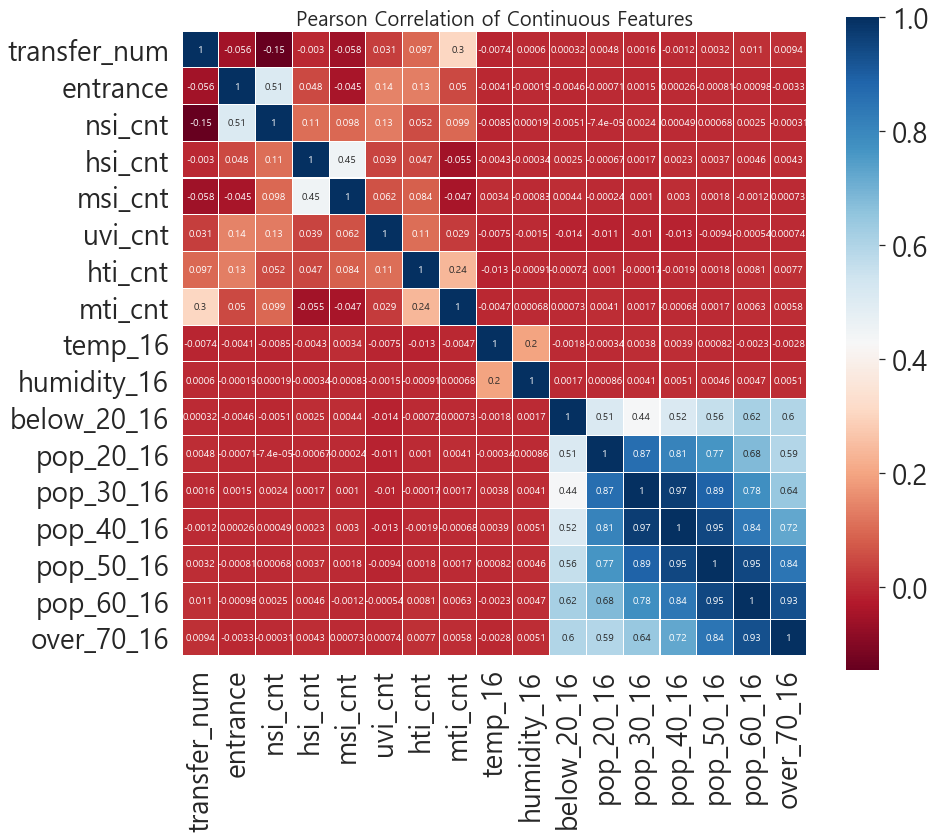

In [7]:
corr_mat_16 = pd.read_csv("C:/Users/Playdata/Playdata_anl/1st_Project/dataset/corr/corr_mat_16.csv", index_col = ['Unnamed: 0'])

plt.figure(figsize = (14, 12))
plt.title('Pearson Correlation of Continuous Features', size = 20)

colormap = plt.cm.RdBu
sns.heatmap(corr_mat_16.astype(float).corr(), cmap = colormap, 
            linewidth = 0.1, linecolor = 'white', square = True, 
            annot = True, annot_kws = {'size': 10})

- 위에 예시로 그려본 **16시에 해당하는 데이터 셋**의```heatmap``` 결과를 보면, **pop 변수들 간의 상관관계가 매우 높은 것을 알 수 있다.**
    - 즉, **다중공선성 문제**가 발생할 것으로 예상된다.
    - 따라서 **pop_40, pop_50, pop_60, over_70**은 **over_40**이라는 **하나의 새로운 변수로 평균 내서 합쳐주겠다.**

In [8]:
from tqdm.notebook import tqdm

for i in tqdm(list(range(5, 24)) + [0]):
    df_train[f'over_40_{i}'] = (df_train[f'pop_40_{i}'] + df_train[f'pop_50_{i}'] +\
                                df_train[f'pop_60_{i}'] + df_train[f'over_70_{i}'])/4
    
    df_test[f'over_40_{i}'] = (df_test[f'pop_40_{i}'] + df_test[f'pop_50_{i}'] +\
                               df_test[f'pop_60_{i}'] + df_test[f'over_70_{i}'])/4

df_train.loc[:, 'over_40_5':'over_40_0']

,over_40_5,over_40_6,over_40_7,over_40_8,over_40_9,over_40_10,over_40_11,over_40_12,over_40_13,over_40_14,over_40_15,over_40_16,over_40_17,over_40_18,over_40_19,over_40_20,over_40_21,over_40_22,over_40_23,over_40_0
107036,4367.75,4411.25,4393.75,4331.50,4294.75,4240.50,4192.75,4106.75,4043.75,4100.75,4077.00,4134.75,4013.75,4126.75,4135.75,4144.00,4198.75,4182.00,4228.75,4318.50
218224,3324.00,3327.00,3302.00,3373.50,3505.75,3639.00,3768.50,3773.75,3921.75,4024.25,3981.25,4070.50,3993.75,3956.25,3860.00,3729.25,3619.75,3548.50,3344.25,3386.00
268391,1308.25,1303.50,1275.50,1300.25,1301.00,1336.00,1334.00,1339.75,1327.00,1275.25,1284.25,1273.75,1316.50,1378.75,1417.25,1420.75,1466.50,1512.00,1272.75,1274.00
266346,4533.25,4761.25,5304.00,6464.75,7341.75,8096.00,8387.50,8491.50,8903.50,8908.50,8674.75,7926.25,7165.25,6769.00,6411.75,5888.75,5496.25,4954.75,4413.75,4234.25
72411,3499.00,3490.25,3467.00,3538.75,3482.75,3501.25,3540.75,3699.50,3683.75,3730.00,3849.25,3970.25,4158.25,4109.00,3846.25,3843.00,3824.75,3840.50,3614.00,3532.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62854,3232.50,3240.75,3250.25,3388.75,3391.00,3475.50,3546.00,3609.75,3610.00,3579.00,3621.75,3488.25,3541.50,3703.00,3725.25,3699.25,3524.75,3359.75,3352.75,3298.50
248258,3049.50,2990.75,2939.25,2970.75,2969.75,2938.00,2914.00,3043.00,3042.00,3022.75,3100.25,3115.25,3116.75,3083.00,3089.50,3119.50,3158.25,3032.50,3220.00,3099.50
57682,4141.50,4439.00,4965.50,6293.75,7373.00,8006.25,8419.75,8763.00,8782.50,8646.50,8523.00,8308.00,7980.50,7305.00,6577.50,6149.75,5600.00,4982.00,4673.75,4341.25
139320,2196.75,2220.25,2401.25,2421.75,2297.50,2295.25,2170.75,2170.00,2205.25,2167.00,2122.50,2117.00,2190.00,2242.75,2207.50,2175.25,2225.50,2212.25,1958.25,1955.75


## 연속형 변수들의 분포 확인
- 로그 변환 여부 결정

Text(0.5, 0, 'transfer_num')

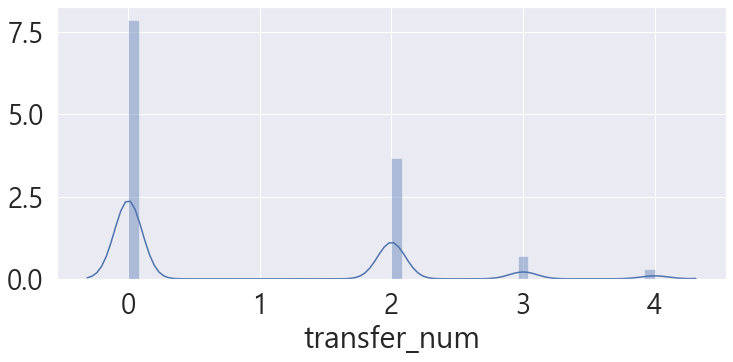

In [9]:
# transfer_num 변수
plt.figure(figsize = (12, 5))

sns.distplot(df_train['transfer_num'])
plt.xlabel('transfer_num')

Text(0.5, 0, 'entrance')

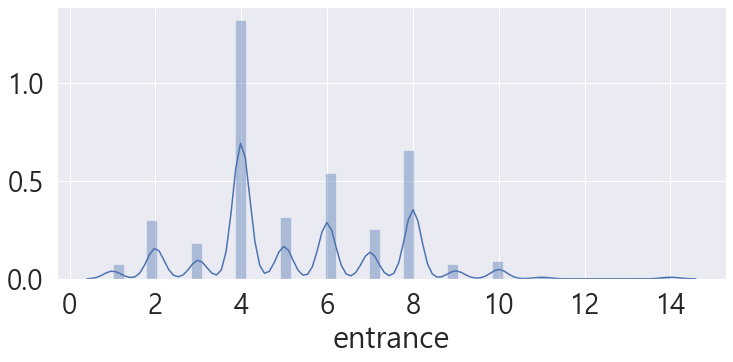

In [10]:
# entrance 변수
plt.figure(figsize = (12, 5))

sns.distplot(df_train['entrance'])
plt.xlabel('entrance')

Text(0.5, 0, 'nsi_cnt')

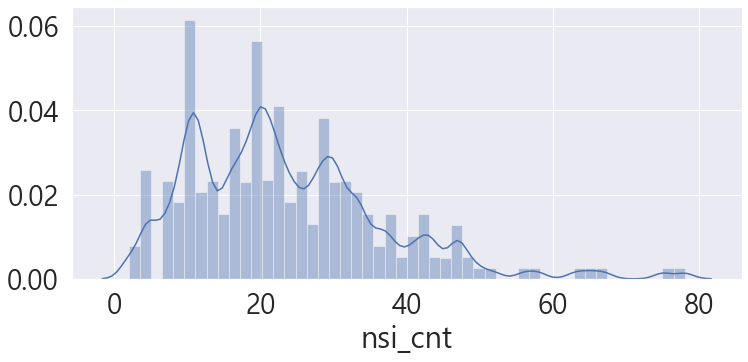

In [11]:
# nsi_cnt 변수
plt.figure(figsize = (12, 5))

sns.distplot(df_train['nsi_cnt'])
plt.xlabel('nsi_cnt')

Text(0.5, 0, 'hsi_cnt')

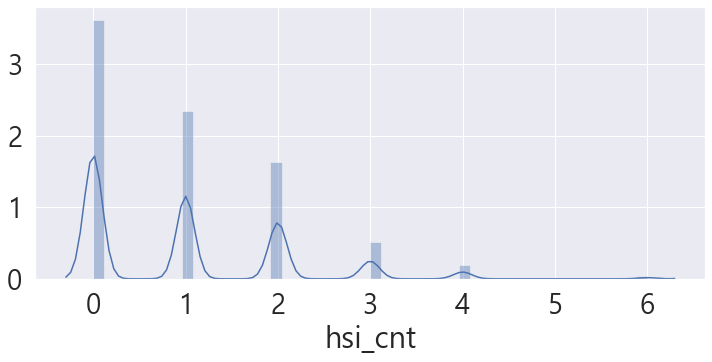

In [12]:
# hsi_cnt 변수
plt.figure(figsize = (12, 5))

sns.distplot(df_train['hsi_cnt'])
plt.xlabel('hsi_cnt')

Text(0.5, 0, 'msi_cnt')

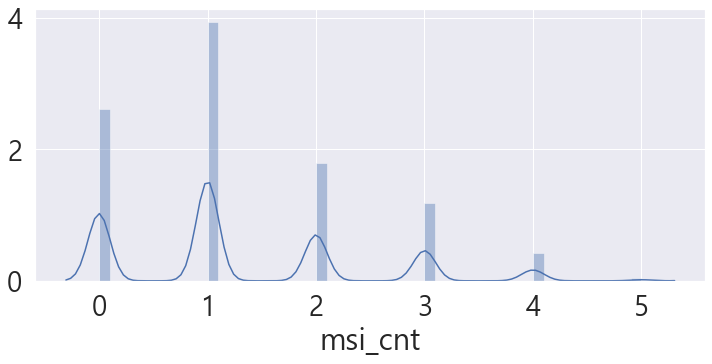

In [13]:
# msi_cnt 변수
plt.figure(figsize = (12, 5))

sns.distplot(df_train['msi_cnt'])
plt.xlabel('msi_cnt')

Text(0.5, 0, 'uvi_cnt')

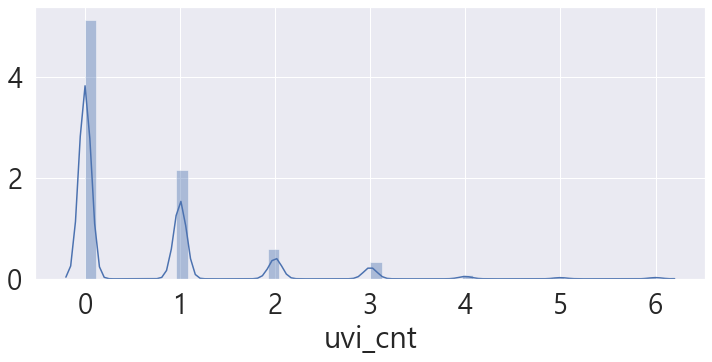

In [14]:
# uvi_cnt 변수
plt.figure(figsize = (12, 5))

sns.distplot(df_train['uvi_cnt'])
plt.xlabel('uvi_cnt')

Text(0.5, 0, 'hti_cnt')

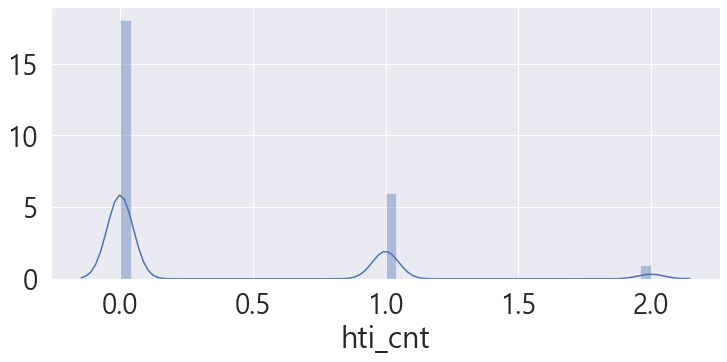

In [15]:
# hti_cnt 변수
plt.figure(figsize = (12, 5))

sns.distplot(df_train['hti_cnt'])
plt.xlabel('hti_cnt')

Text(0.5, 0, 'mti_cnt')

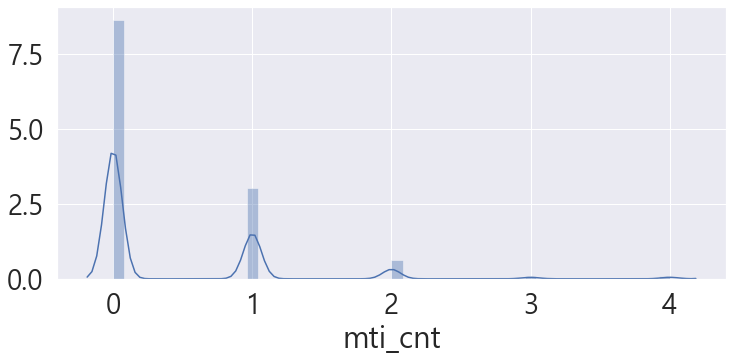

In [16]:
# mti_cnt 변수
plt.figure(figsize = (12, 5))

sns.distplot(df_train['mti_cnt'])
plt.xlabel('mti_cnt')

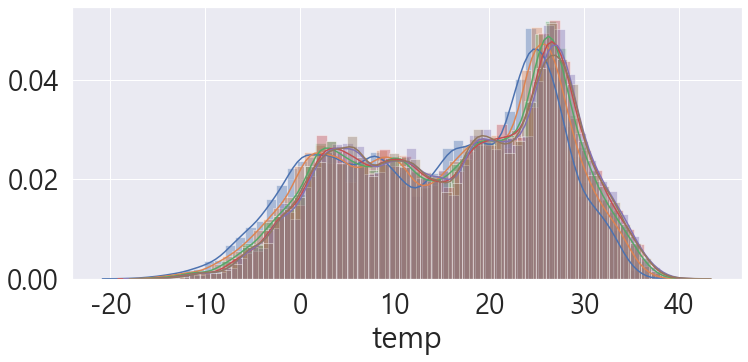

In [17]:
# temp 변수
plt.figure(figsize = (12, 5))

from tqdm.notebook import tqdm

for i in tqdm(range(11, 17)):
    sns.distplot(df_train[f'temp_{i}'])
    plt.xlabel('temp')

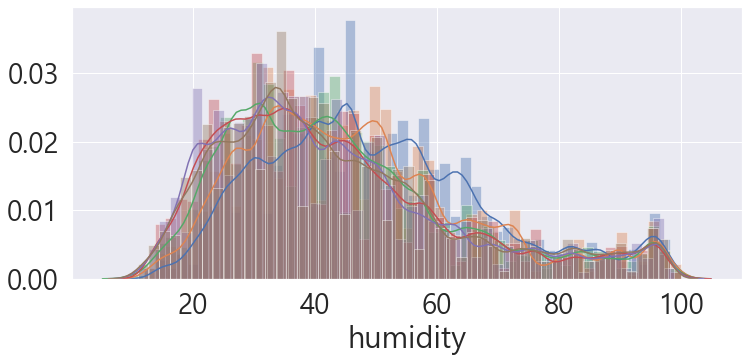

In [18]:
# humidity 변수
plt.figure(figsize = (12, 5))

from tqdm.notebook import tqdm

for i in tqdm(range(11, 17)):
    sns.distplot(df_train[f'humidity_{i}'])
    plt.xlabel('humidity')

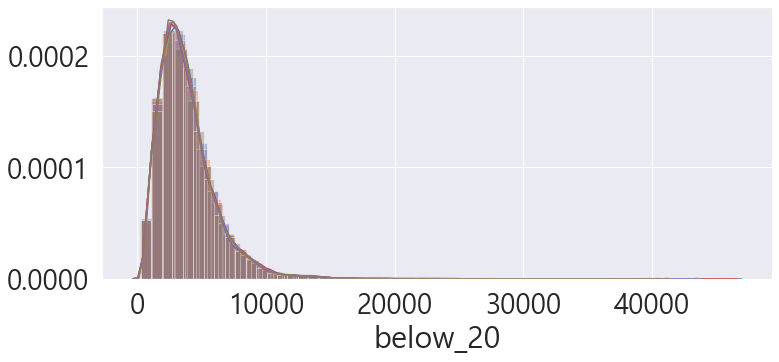

In [19]:
# below_20 변수
plt.figure(figsize = (12, 5))

from tqdm.notebook import tqdm

for i in tqdm(range(11, 17)):
    sns.distplot(df_train[f'below_20_{i}'])
    plt.xlabel('below_20')

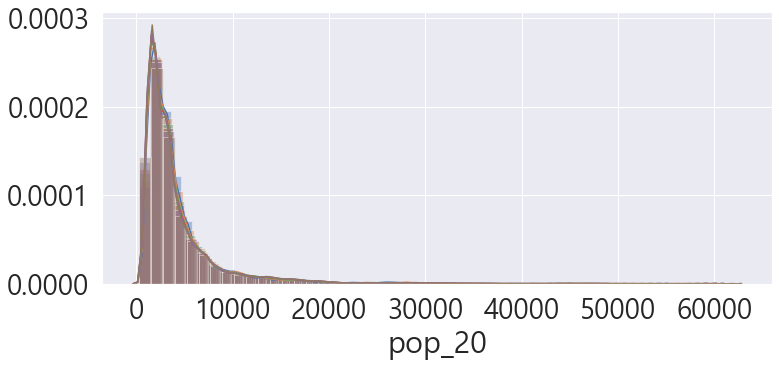

In [20]:
# pop_20 변수
plt.figure(figsize = (12, 5))

from tqdm.notebook import tqdm

for i in tqdm(range(11, 17)):
    sns.distplot(df_train[f'pop_20_{i}'])
    plt.xlabel('pop_20')

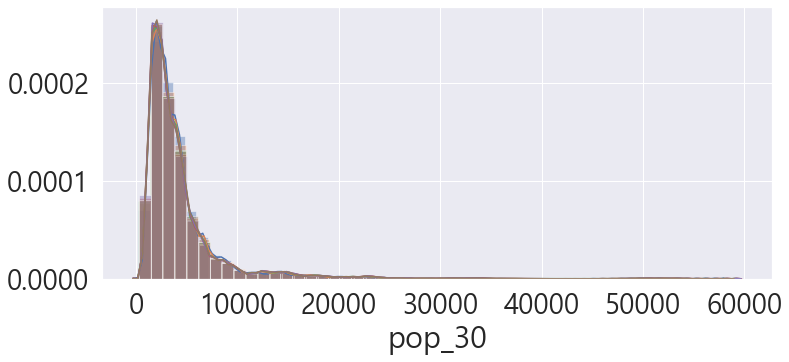

In [21]:
# pop_30 변수
plt.figure(figsize = (12, 5))

from tqdm.notebook import tqdm

for i in tqdm(range(11, 17)):
    sns.distplot(df_train[f'pop_30_{i}'])
    plt.xlabel('pop_30')

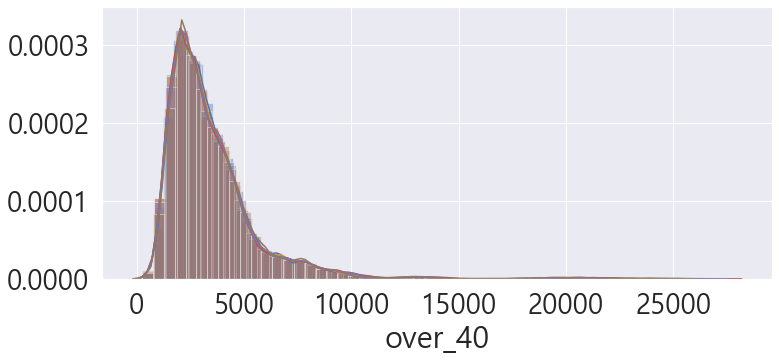

In [22]:
# over_40 변수
plt.figure(figsize = (12, 5))

from tqdm.notebook import tqdm

for i in tqdm(range(11, 17)):
    sns.distplot(df_train[f'over_40_{i}'])
    plt.xlabel('over_40')

- 위 그래프들을 토대로, **'transfer_num, nsi_cnt, hsi_cnt, msi_cnt, uvi_cnt, hti_cnt, mti_cnt, humidity, below_20, pop_20, pop_30, over_40' 12개의 변수들**에 대해서는 **로그 변환**을 수행해 볼 필요가 있다는 것을 알 수 있다.

In [23]:
# from tqdm.notebook import tqdm

# base = 10

# for i in tqdm(list(range(5, 24)) + [0]):
#     df_train[f'log_below_20_{i}'] = np.log1p(df_train[f'below_20_{i}'] / np.log(base))
#     df_train[f'log_pop_20_{i}'] = np.log1p(df_train[f'pop_20_{i}'] / np.log(base))
#     df_train[f'log_pop_30_{i}'] = np.log1p(df_train[f'pop_30_{i}'] / np.log(base))
#     df_train[f'log_over_40_{i}'] = np.log1p(df_train[f'over_40_{i}'] / np.log(base))
    
#     df_test[f'log_below_20_{i}'] = np.log1p(df_test[f'below_20_{i}'] / np.log(base))
#     df_test[f'log_pop_20_{i}'] = np.log1p(df_test[f'pop_20_{i}'] / np.log(base))
#     df_test[f'log_pop_30_{i}'] = np.log1p(df_test[f'pop_30_{i}'] / np.log(base))
#     df_test[f'log_over_40_{i}'] = np.log1p(df_test[f'over_40_{i}'] / np.log(base))
    
# df_train.head()

In [24]:
from tqdm.notebook import tqdm

for i in tqdm(range(11, 17)):
    # 값들에 1을 더해 준 뒤, 그냥 log를 취해주도록 하겠음
    # '+1'을 안해주면, 로그를 취했을 때 NaN과 inf 값이 존재하는 문제가 발생하기 때문!!
    df_train[f'log_humidity_{i}'] = np.log1p(df_train[f'humidity_{i}'])
    df_train[f'log_below_20_{i}'] = np.log1p(df_train[f'below_20_{i}'])
    df_train[f'log_pop_20_{i}'] = np.log1p(df_train[f'pop_20_{i}'])
    df_train[f'log_pop_30_{i}'] = np.log1p(df_train[f'pop_30_{i}'])
    df_train[f'log_over_40_{i}'] = np.log1p(df_train[f'over_40_{i}'])
    df_train['log_transfer_num'] = np.log1p(df_train['transfer_num'])
#     df_train['log_entrance'] = np.log1p(df_train['entrance'])
    df_train['log_nsi_cnt'] = np.log1p(df_train['nsi_cnt'])
    df_train['log_hsi_cnt'] = np.log1p(df_train['hsi_cnt'])
    df_train['log_msi_cnt'] = np.log1p(df_train['msi_cnt'])
    df_train['log_uvi_cnt'] = np.log1p(df_train['uvi_cnt'])
    df_train['log_hti_cnt'] = np.log1p(df_train['hti_cnt'])
    df_train['log_mti_cnt'] = np.log1p(df_train['mti_cnt'])
    
    df_test[f'log_humidity_{i}'] = np.log1p(df_test[f'humidity_{i}'])
    df_test[f'log_below_20_{i}'] = np.log1p(df_test[f'below_20_{i}'])
    df_test[f'log_pop_20_{i}'] = np.log1p(df_test[f'pop_20_{i}'])
    df_test[f'log_pop_30_{i}'] = np.log1p(df_test[f'pop_30_{i}'])
    df_test[f'log_over_40_{i}'] = np.log1p(df_test[f'over_40_{i}'])
    df_test['log_transfer_num'] = np.log1p(df_test['transfer_num'])
#     df_test['log_entrance'] = np.log1p(df_test['entrance'])
    df_test['log_nsi_cnt'] = np.log1p(df_test['nsi_cnt'])
    df_test['log_hsi_cnt'] = np.log1p(df_test['hsi_cnt'])
    df_test['log_msi_cnt'] = np.log1p(df_test['msi_cnt'])
    df_test['log_uvi_cnt'] = np.log1p(df_test['uvi_cnt'])
    df_test['log_hti_cnt'] = np.log1p(df_test['hti_cnt'])
    df_test['log_mti_cnt'] = np.log1p(df_test['mti_cnt'])
    
df_train.head()

,date,month,weekdays,season,line,station_num,station_name,type,gu,rain,...,log_humidity_15,log_below_20_15,log_pop_20_15,log_pop_30_15,log_over_40_15,log_humidity_16,log_below_20_16,log_pop_20_16,log_pop_30_16,log_over_40_16
107036,2019-06-22,6,5,summer,7호선,2717,하계,섬식,노원구,0,...,3.295837,8.301025,8.859789,8.370548,8.313362,3.465736,8.285765,8.821142,8.360539,8.327424
218224,2018-06-26,6,1,summer,4호선,424,명동,섬식,중구,1,...,4.584967,8.782016,9.517531,8.781402,8.289602,4.574711,8.755580,9.560786,8.786609,8.311767
268391,2019-06-10,6,0,summer,4호선,411,노원,상대식,노원구,1,...,4.110874,6.873164,6.886532,7.207119,7.158709,3.970292,6.810142,6.839476,7.155396,7.150505
266346,2019-10-09,10,2,autumn,4호선,413,쌍문,상대식,도봉구,0,...,3.367296,9.053336,10.507366,9.587955,9.068287,3.332205,9.054154,10.496510,9.526901,8.978061
72411,2019-07-23,7,1,summer,5호선,2551,굽은다리(강동구민회관앞),상대식,강동구,0,...,3.988984,8.289791,8.897956,8.588583,8.255893,3.951244,8.324579,8.940105,8.651199,8.286836


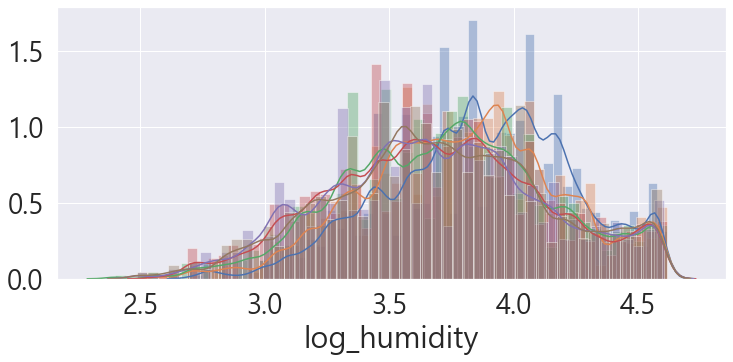

In [25]:
# log_humidity 변수
plt.figure(figsize = (12, 5))

from tqdm.notebook import tqdm

for i in tqdm(range(11, 17)):
    sns.distplot(df_train[f'log_humidity_{i}'])
    plt.xlabel('log_humidity')

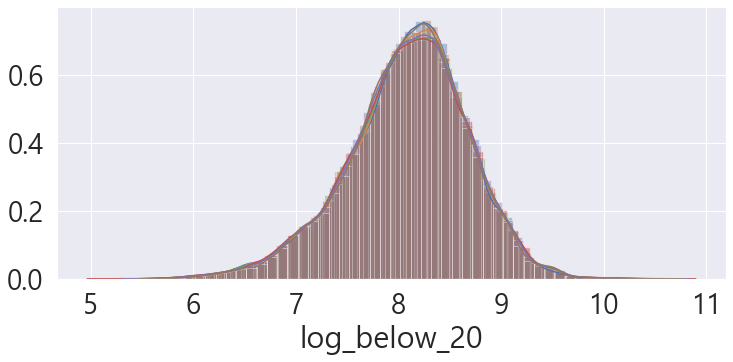

In [26]:
# log_below_20 변수
plt.figure(figsize = (12, 5))

from tqdm.notebook import tqdm

for i in tqdm(range(11, 17)):
    sns.distplot(df_train[f'log_below_20_{i}'])
    plt.xlabel('log_below_20')

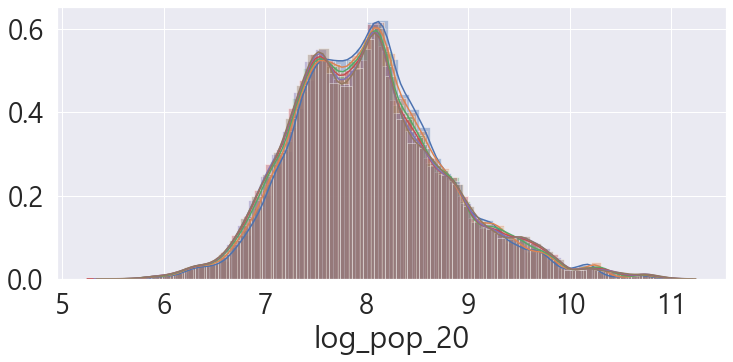

In [27]:
# log_pop_20 변수
plt.figure(figsize = (12, 5))

from tqdm.notebook import tqdm

for i in tqdm(range(11, 17)):
    sns.distplot(df_train[f'log_pop_20_{i}'])
    plt.xlabel('log_pop_20')

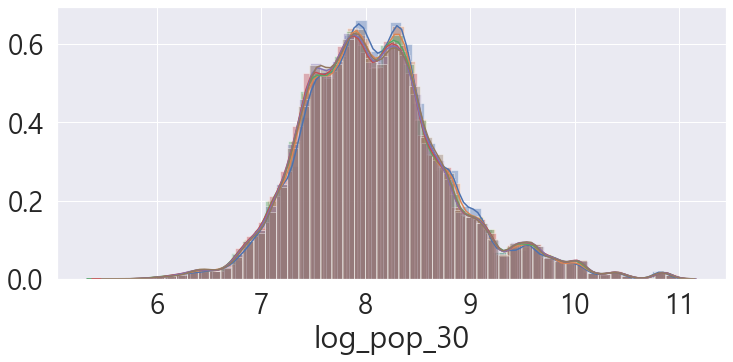

In [28]:
# log_pop_30 변수
plt.figure(figsize = (12, 5))

from tqdm.notebook import tqdm

for i in tqdm(range(11, 17)):
    sns.distplot(df_train[f'log_pop_30_{i}'])
    plt.xlabel('log_pop_30')

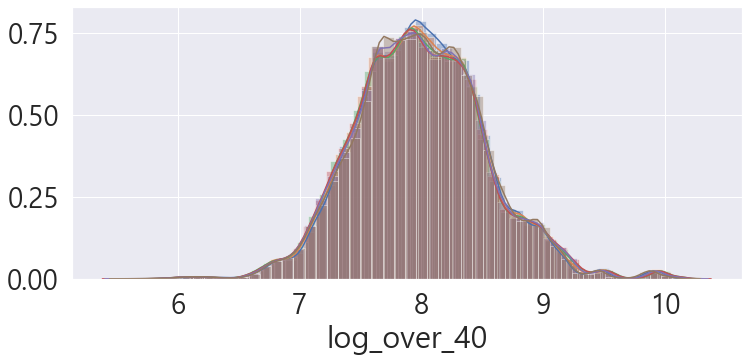

In [29]:
# log_over_40 변수
plt.figure(figsize = (12, 5))

from tqdm.notebook import tqdm

for i in tqdm(range(11, 17)):
    sns.distplot(df_train[f'log_over_40_{i}'])
    plt.xlabel('log_over_40')

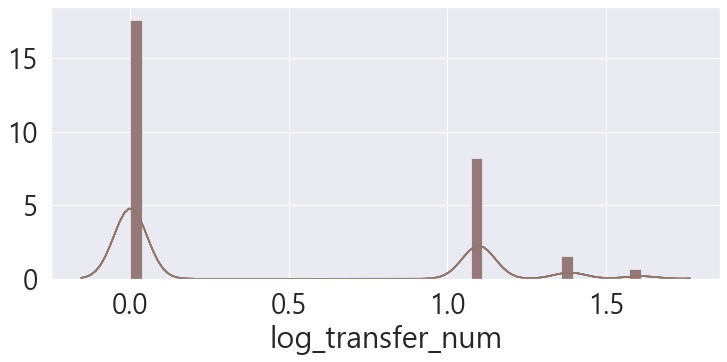

In [30]:
# log_transfer_num 변수
plt.figure(figsize = (12, 5))

from tqdm.notebook import tqdm

for i in tqdm(range(11, 17)):
    sns.distplot(df_train['log_transfer_num'])
    plt.xlabel('log_transfer_num')

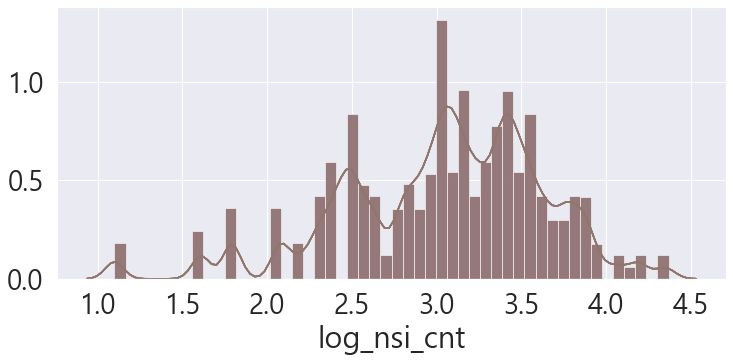

In [31]:
# log_nsi_cnt 변수
plt.figure(figsize = (12, 5))

from tqdm.notebook import tqdm

for i in tqdm(range(11, 17)):
    sns.distplot(df_train['log_nsi_cnt'])
    plt.xlabel('log_nsi_cnt')

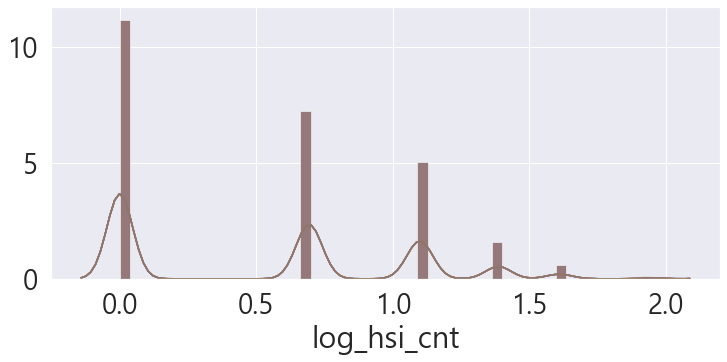

In [32]:
# log_hsi_cnt 변수
plt.figure(figsize = (12, 5))

from tqdm.notebook import tqdm

for i in tqdm(range(11, 17)):
    sns.distplot(df_train['log_hsi_cnt'])
    plt.xlabel('log_hsi_cnt')

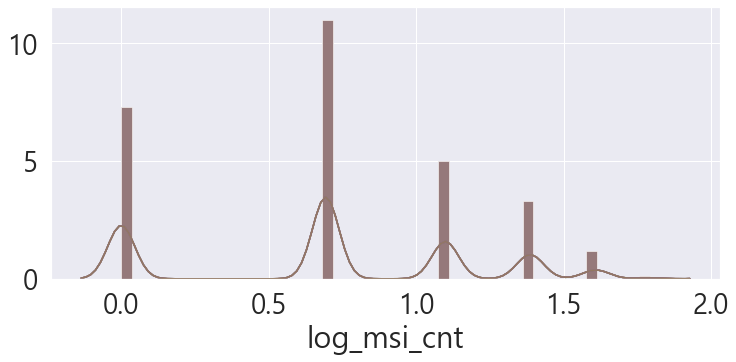

In [33]:
# log_msi_cnt 변수
plt.figure(figsize = (12, 5))

from tqdm.notebook import tqdm

for i in tqdm(range(11, 17)):
    sns.distplot(df_train['log_msi_cnt'])
    plt.xlabel('log_msi_cnt')

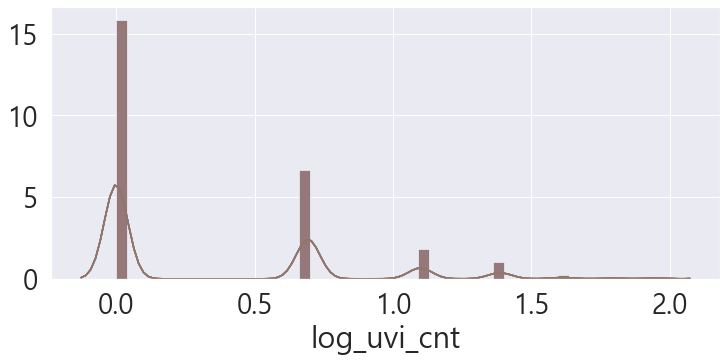

In [34]:
# log_uvi_cnt 변수
plt.figure(figsize = (12, 5))

from tqdm.notebook import tqdm

for i in tqdm(range(11, 17)):
    sns.distplot(df_train['log_uvi_cnt'])
    plt.xlabel('log_uvi_cnt')

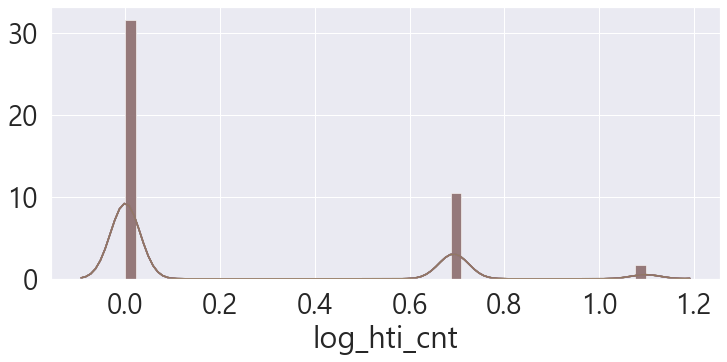

In [35]:
# log_hti_cnt 변수
plt.figure(figsize = (12, 5))

from tqdm.notebook import tqdm

for i in tqdm(range(11, 17)):
    sns.distplot(df_train['log_hti_cnt'])
    plt.xlabel('log_hti_cnt')

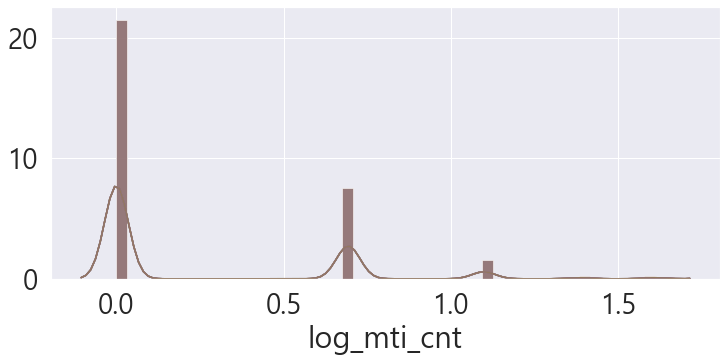

In [36]:
# log_mti_cnt 변수
plt.figure(figsize = (12, 5))

from tqdm.notebook import tqdm

for i in tqdm(range(11, 17)):
    sns.distplot(df_train['log_mti_cnt'])
    plt.xlabel('log_mti_cnt')

- 로그 변환 후의 분포를 보면, **"log_transfer_num, log_hsi_cnt, log_msi_cnt, log_uvi_cnt, log_hti_cnt, log_mti_cnt" 변수들에 대해서 로그 변환을 해주는 것은 무의미**해보인다.
    - 따라서 **위 6개의 변수들은 로그 변환을 하지 않은 값들을 사용**하겠다.
    - 즉, **총 6개의 변수들에 대해서만 로그 변환을 적용**시키도록 하겠다.

# Feature Scaling
**<Target 변수(혼잡도)> - 총 20개**
- doc_0 + doc_5~23
- doc: degree of congestion


**<범주형 변수> - 모델에 넣어줄 변수는 총 7개**
1. date (구분을 위해 넣어주었을 뿐, 사용 x)
    - 날짜
2. date에서 파생변수 생성
    - month(월)
    - weekdays(요일) --> 0:월요일, ... , 6: 일요일
    - season(계절) (winter: 12 ~ 2월, sprint: 3 ~ 5월, summer: 6 ~ 8월, autumn: 9 ~ 11월)
3. line
    - 1~8호선
4. station_num (구분을 위해 넣어주었을 뿐, 사용 x)
    - 지하철 역 코드번호
5. station_name (구분을 위해 넣어주었을 뿐, 사용 x)
    - 지하철 역 이름
6. type
    - 섬식/상대식/복합식
7. gu
    - 25개의 자치구
8. rain
    - 비 내림 여부
    - 모든 시간대 중, 하나의 시간대라도 비가 왔으면 "1", 그렇지 않으면 "0"


**<연속형 변수> - 모델에 넣어줄 변수는 총 188개**
1. area (사용 x)
    - 역사 면적
2. platform_area (혼잡도 지표를 계산할 때 사용하고, 모델에는 사용 x)
    - 승장장 면적
3. transfer_num
    - 환승 노선 개수
4. entrance
    - 출입구 개수
5. nsi_cnt
    - 역 주변 시설 총 개수
6. hsi_cnt
    - 역 주변 고등학교 개수
7. msi_cnt
    - 역 주변 중학교 개수
8. uvi_cnt
    - 역 주변 대학교 개수
9. hti_cnt
    - 역 주변 병원 개수
10. mti_cnt
    - 역 주변 영화관 개수
11. 기온_0 + 기온_5~23
    - temp_0 + temp_5~23 으로 변수명 변경해주어야 함
12. 습도(%)_0 + 습도(%)_5~23
    - humidity_0 + humidity_5~23 으로 변수명 변경해주어야 함
13. 강수량(mm)_0 + 강수량(mm)_5~23 (사용 x)
    - rain_0 + rain_5~23 으로 변수명 변경해주어야 함
    - 이 변수들을 그냥 사용하는 것은 무의미해 보임
    - 따라서 비가 오는지 여부에 따라 0과 1로 구분해주는 새로운 범주형 "rain" 변수를 생성 해주었음
14. below_20_0 + below_20_5~23
    - 역이 속한 행정동의 시간대별 20세미만 유동인구 수
15. pop_20_0 + pop_20_5~23
    - 역이 속한 행정동의 시간대별 20대 유동인구 수
16. pop_30_0 + pop_30_5~23
    - 역이 속한 행정동의 시간대별 30대 유동인구 수
17. pop_40_0 + pop_40_5~23
    - 역이 속한 행정동의 시간대별 40대 유동인구 수
18. pop_50_0 + pop_50_5~23
    - 역이 속한 행정동의 시간대별 50대 유동인구 수
19. pop_60_0 + pop_60_5~23
    - 역이 속한 행정동의 시간대별 60대 유동인구 수
20. over_70_0 + over_70_5~23
    - 역시 속한 행정동의 시간대별 70세이상 유동인구 수

# Feature Scaling

In [37]:
# Dataset of Features
X_features_df_train = df_train[[# 범주형 변수
                                'date', 'month', 'weekdays', 'season', 'line', 'station_num', 'station_name', 'type', 'gu', 'rain',
    
                                # 연속형 변수
                                'area', 'platform_area', 'transfer_num', 'entrance', 'log_nsi_cnt', 'hsi_cnt', 'msi_cnt', 'uvi_cnt', 'hti_cnt', 'mti_cnt',

                                'temp_11', 'temp_12', 'temp_13', 'temp_14', 'temp_15', 'temp_16',

                                'log_humidity_11', 'log_humidity_12', 'log_humidity_13', 'log_humidity_14', 'log_humidity_15', 'log_humidity_16',

                                'log_below_20_11', 'log_below_20_12', 'log_below_20_13', 'log_below_20_14', 'log_below_20_15', 'log_below_20_16',

                                'log_pop_20_11', 'log_pop_20_12', 'log_pop_20_13', 'log_pop_20_14', 'log_pop_20_15', 'log_pop_20_16',

                                'log_pop_30_11', 'log_pop_30_12', 'log_pop_30_13', 'log_pop_30_14', 'log_pop_30_15', 'log_pop_30_16',

                                'log_over_40_11', 'log_over_40_12', 'log_over_40_13', 'log_over_40_14', 'log_over_40_15', 'log_over_40_16']]

# Dataset of Features
X_features_df_test = df_test[[# 범주형 변수
                              'date', 'month', 'weekdays', 'season', 'line', 'station_num', 'station_name', 'type', 'gu', 'rain',
    
                              # 연속형 변수
                              'area', 'platform_area', 'transfer_num', 'entrance', 'log_nsi_cnt', 'hsi_cnt', 'msi_cnt', 'uvi_cnt', 'hti_cnt', 'mti_cnt',

                              'temp_11', 'temp_12', 'temp_13', 'temp_14', 'temp_15', 'temp_16',

                              'log_humidity_11', 'log_humidity_12', 'log_humidity_13', 'log_humidity_14', 'log_humidity_15', 'log_humidity_16',

                              'log_below_20_11', 'log_below_20_12', 'log_below_20_13', 'log_below_20_14', 'log_below_20_15', 'log_below_20_16',

                              'log_pop_20_11', 'log_pop_20_12', 'log_pop_20_13', 'log_pop_20_14', 'log_pop_20_15', 'log_pop_20_16',

                              'log_pop_30_11', 'log_pop_30_12', 'log_pop_30_13', 'log_pop_30_14', 'log_pop_30_15', 'log_pop_30_16',

                              'log_over_40_11', 'log_over_40_12', 'log_over_40_13', 'log_over_40_14', 'log_over_40_15', 'log_over_40_16']]

X_features_df_train

,date,month,weekdays,season,line,station_num,station_name,type,gu,rain,...,log_pop_30_13,log_pop_30_14,log_pop_30_15,log_pop_30_16,log_over_40_11,log_over_40_12,log_over_40_13,log_over_40_14,log_over_40_15,log_over_40_16
107036,2019-06-22,6,5,summer,7호선,2717,하계,섬식,노원구,0,...,8.387768,8.384576,8.370548,8.360539,8.341351,8.320631,8.305175,8.319169,8.313362,8.327424
218224,2018-06-26,6,1,summer,4호선,424,명동,섬식,중구,1,...,8.688622,8.744807,8.781402,8.786609,8.234698,8.236089,8.274548,8.300342,8.289602,8.311767
268391,2019-06-10,6,0,summer,4호선,411,노원,상대식,노원구,1,...,7.244228,7.171657,7.207119,7.155396,7.196687,7.200984,7.191429,7.151681,7.158709,7.150505
266346,2019-10-09,10,2,autumn,4호선,413,쌍문,상대식,도봉구,0,...,9.600015,9.608848,9.587955,9.526901,9.034617,9.046939,9.094312,9.094873,9.068287,8.978061
72411,2019-07-23,7,1,summer,5호선,2551,굽은다리(강동구민회관앞),상대식,강동구,0,...,8.531096,8.578853,8.588583,8.651199,8.172376,8.216223,8.211958,8.224432,8.255893,8.286836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62854,2017-02-10,2,4,winter,5호선,2558,오금,상대식,송파구,0,...,8.537192,8.549467,8.544030,8.573574,8.173857,8.191671,8.191740,8.183118,8.194989,8.157442
248258,2017-09-09,9,5,autumn,3호선,329,고속터미널,상대식,서초구,0,...,7.622175,7.615791,7.644441,7.645398,7.977625,8.020928,8.020599,8.014253,8.039561,8.044386
57682,2017-10-11,10,2,autumn,5호선,2547,광나루(장신대),상대식,광진구,1,...,10.027076,10.031265,10.038805,10.043554,9.038454,9.078408,9.080630,9.065026,9.050641,9.025095
139320,2018-11-28,11,2,autumn,2호선,234,신도림,복합식,구로구,0,...,7.478735,7.516977,7.521859,7.526179,7.683289,7.682943,7.699050,7.681560,7.660821,7.658228


In [38]:
# Dataset of Target variables
y_target_df_train = df_train[[f'doc_{i}' for i in range(11, 17)]]

# Dataset of Target variables
y_target_df_test = df_test[[f'doc_{i}' for i in range(11, 17)]]

y_target_df_train

,doc_11,doc_12,doc_13,doc_14,doc_15,doc_16
107036,98.6,116.3,117.4,106.3,118.6,124.9
218224,123.1,125.3,130.0,124.9,137.7,158.5
268391,65.1,67.0,68.4,71.6,77.9,88.5
266346,138.7,139.5,137.7,126.5,130.8,144.9
72411,40.5,50.6,45.0,44.0,46.1,61.8
...,...,...,...,...,...,...
62854,10.9,11.7,13.4,11.5,12.4,16.3
248258,244.5,281.7,298.5,314.4,326.7,342.2
57682,50.3,49.4,53.4,52.5,55.2,72.1
139320,67.5,70.7,73.0,73.8,77.4,94.6


In [39]:
# Categorical X variables
X_features_df_train_cate = X_features_df_train.iloc[:, :10]
# Categorical X variables
X_features_df_test_cate = X_features_df_test.iloc[:, :10]

# Continuous X variables
X_features_df_train_cont = X_features_df_train.iloc[:, 10:]
# Continuous X variables
X_features_df_test_cont = X_features_df_test.iloc[:, 10:]

In [40]:
X_features_df_train_cate

,date,month,weekdays,season,line,station_num,station_name,type,gu,rain
107036,2019-06-22,6,5,summer,7호선,2717,하계,섬식,노원구,0
218224,2018-06-26,6,1,summer,4호선,424,명동,섬식,중구,1
268391,2019-06-10,6,0,summer,4호선,411,노원,상대식,노원구,1
266346,2019-10-09,10,2,autumn,4호선,413,쌍문,상대식,도봉구,0
72411,2019-07-23,7,1,summer,5호선,2551,굽은다리(강동구민회관앞),상대식,강동구,0
...,...,...,...,...,...,...,...,...,...,...
62854,2017-02-10,2,4,winter,5호선,2558,오금,상대식,송파구,0
248258,2017-09-09,9,5,autumn,3호선,329,고속터미널,상대식,서초구,0
57682,2017-10-11,10,2,autumn,5호선,2547,광나루(장신대),상대식,광진구,1
139320,2018-11-28,11,2,autumn,2호선,234,신도림,복합식,구로구,0


In [41]:
X_features_df_train_cont

,area,platform_area,transfer_num,entrance,log_nsi_cnt,hsi_cnt,msi_cnt,uvi_cnt,hti_cnt,mti_cnt,...,log_pop_30_13,log_pop_30_14,log_pop_30_15,log_pop_30_16,log_over_40_11,log_over_40_12,log_over_40_13,log_over_40_14,log_over_40_15,log_over_40_16
107036,9222.08,2061.15,0,6,3.433987,2,4,1,0,2,...,8.387768,8.384576,8.370548,8.360539,8.341351,8.320631,8.305175,8.319169,8.313362,8.327424
218224,7820.40,2832.00,0,10,3.583519,1,0,2,1,2,...,8.688622,8.744807,8.781402,8.786609,8.234698,8.236089,8.274548,8.300342,8.289602,8.311767
268391,6639.00,2978.00,2,4,3.401197,2,4,1,1,1,...,7.244228,7.171657,7.207119,7.155396,7.196687,7.200984,7.191429,7.151681,7.158709,7.150505
266346,7466.00,2089.00,0,4,3.044522,2,4,0,1,1,...,9.600015,9.608848,9.587955,9.526901,9.034617,9.046939,9.094312,9.094873,9.068287,8.978061
72411,4838.60,1826.20,0,4,2.484907,0,3,0,0,1,...,8.531096,8.578853,8.588583,8.651199,8.172376,8.216223,8.211958,8.224432,8.255893,8.286836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62854,7667.04,2570.00,2,5,2.772589,1,2,0,0,0,...,8.537192,8.549467,8.544030,8.573574,8.173857,8.191671,8.191740,8.183118,8.194989,8.157442
248258,17268.90,3799.00,3,3,2.564949,0,1,1,1,1,...,7.622175,7.615791,7.644441,7.645398,7.977625,8.020928,8.020599,8.014253,8.039561,8.044386
57682,7995.90,2230.70,0,4,3.367296,1,3,1,0,0,...,10.027076,10.031265,10.038805,10.043554,9.038454,9.078408,9.080630,9.065026,9.050641,9.025095
139320,19246.00,7175.00,2,3,3.465736,0,1,1,0,2,...,7.478735,7.516977,7.521859,7.526179,7.683289,7.682943,7.699050,7.681560,7.660821,7.658228


- 스케일링 방법으로는 이상치에 덜 민감한 ```RobustScaler()```를 사용하도록 하겠다.

In [42]:
from sklearn.preprocessing import RobustScaler

# RobustScaler 객체 생성
scaler = RobustScaler()

# RobustScaler 데이터 셋 변환. fit()과 transform() 호출
scaler.fit(X_features_df_train_cont)
X_features_df_train_cont_scaled = scaler.transform(X_features_df_train_cont)

# transform()을 수행하면 스케일 변환된 데이터 셋이 Numpy ndarray로 반환되기 때문에, 이를 DataFrame으로 변경
X_features_df_train_cont_scaled = pd.DataFrame(X_features_df_train_cont_scaled, columns = X_features_df_train_cont.columns)


# RobustScaler 객체 생성
scaler = RobustScaler()

# RobustScaler 데이터 셋 변환. fit()과 transform() 호출
scaler.fit(X_features_df_test_cont)
X_features_df_test_cont_scaled = scaler.transform(X_features_df_test_cont)

# transform()을 수행하면 스케일 변환된 데이터 셋이 Numpy ndarray로 반환되기 때문에, 이를 DataFrame으로 변경
X_features_df_test_cont_scaled = pd.DataFrame(X_features_df_test_cont_scaled, columns = X_features_df_test_cont.columns)

In [43]:
# 분리해주었던 데이터 셋들을 결합하기 전에, reset_index()로 index를 재설정 해주어야 함!!(안 그러면 pd.concat()이 이상하게 된다..)
X_features_df_train_cate.reset_index(inplace = True, drop = True)
X_features_df_train_cont_scaled.reset_index(inplace = True, drop = True)
X_features_df_test_cate.reset_index(inplace = True, drop = True)
X_features_df_test_cont_scaled.reset_index(inplace = True, drop = True)

# 스케일링 작업을 하기 위해 분리시켜주었던 X_features_cate와 다시 결합
X_features_df_train_scaled = pd.concat([X_features_df_train_cate, X_features_df_train_cont_scaled], axis = 1)
X_features_df_test_scaled = pd.concat([X_features_df_test_cate, X_features_df_test_cont_scaled], axis = 1)

In [50]:
# concat이 제대로 수행되었는지 확인!!
X_features_df_train_cate.shape, X_features_df_train_cont_scaled.shape, X_features_df_train_scaled.shape

((221798, 10), (221798, 46), (221798, 56))

In [51]:
# 분리해주었던 데이터 셋들을 결합하기 전에, reset_index()로 index를 재설정 해주어야 함!!(안 그러면 pd.concat()이 이상하게 된다..)
X_features_df_train_scaled.reset_index(inplace = True, drop = True)
X_features_df_test_scaled.reset_index(inplace = True, drop = True)
y_target_df_train.reset_index(inplace = True, drop = True)
y_target_df_test.reset_index(inplace = True, drop = True)

# X_features_scaled와 y_target을 결합해서 전체 데이터 셋 생성
df_train_scaled = pd.concat([X_features_df_train_scaled, y_target_df_train], axis = 1)
df_test_scaled = pd.concat([X_features_df_test_scaled, y_target_df_test], axis = 1)

In [52]:
X_features_df_train_scaled.shape, y_target_df_train.shape, df_train_scaled.shape

((221798, 56), (221798, 6), (221798, 62))

- 다음으로 {i}를 설정해서 **11 ~ 16시** 데이터에 해당하는 변수들을 불러오겠다.

In [53]:
from tqdm.notebook import tqdm

def df_train_test_check(i):
    df_train_check = df_train_scaled[['date', 'month', 'weekdays', 'season', 'line', 'station_num', 'station_name', 'type', 'gu', 'rain', 
                                      'transfer_num', 'entrance', 'log_nsi_cnt', 'hsi_cnt', 'msi_cnt', 'uvi_cnt', 'hti_cnt', 'mti_cnt', 
                                      f'temp_{i}', f'log_humidity_{i}', f'log_below_20_{i}', f'log_pop_20_{i}', f'log_pop_30_{i}', f'log_over_40_{i}',
                                      f'doc_{i}']]
    
    df_train_check.to_csv(f'C:/Users/Playdata/Playdata_anl/1st_Project/dataset/df_train_test_check/df_train_check_{i}.csv')

    df_test_check = df_test_scaled[['date', 'month', 'weekdays', 'season', 'line', 'station_num', 'station_name', 'type', 'gu', 'rain', 
                                    'transfer_num', 'entrance', 'log_nsi_cnt', 'hsi_cnt', 'msi_cnt', 'uvi_cnt', 'hti_cnt', 'mti_cnt', 
                                    f'temp_{i}', f'log_humidity_{i}', f'log_below_20_{i}', f'log_pop_20_{i}', f'log_pop_30_{i}', f'log_over_40_{i}',
                                    f'doc_{i}']]
    
    df_test_check.to_csv(f'C:/Users/Playdata/Playdata_anl/1st_Project/dataset/df_train_test_check/df_test_check_{i}.csv')

for i in tqdm(list(range(11, 17))):
    df_train_test_check(i)

**Feature Selection**
- 원-핫 인코딩 작업을 수행해주기 전에, 모델에 넣어줄 변수들을 선택해주도록 하겠다.
    - 모델에 넣어줄 인구 데이터 변수들을 선택할 때, 로그 변환이 된 변수들을 넣어줘야 함에 주의하자!!

In [54]:
# 분석할 시간대를 "11~16시"로 제한했기 때문에, 해당 시간대의 데이터들만 불러왔음

# 위에서 만들어놓은 df_train_check_{i} 파일들 불러오기
df_train_check_11 = pd.read_csv("C:/Users/Playdata/Playdata_anl/1st_Project/dataset/df_train_test_check/df_train_check_11.csv", index_col = ['Unnamed: 0'])
df_train_check_12 = pd.read_csv("C:/Users/Playdata/Playdata_anl/1st_Project/dataset/df_train_test_check/df_train_check_12.csv", index_col = ['Unnamed: 0'])
df_train_check_13 = pd.read_csv("C:/Users/Playdata/Playdata_anl/1st_Project/dataset/df_train_test_check/df_train_check_13.csv", index_col = ['Unnamed: 0'])
df_train_check_14 = pd.read_csv("C:/Users/Playdata/Playdata_anl/1st_Project/dataset/df_train_test_check/df_train_check_14.csv", index_col = ['Unnamed: 0'])
df_train_check_15 = pd.read_csv("C:/Users/Playdata/Playdata_anl/1st_Project/dataset/df_train_test_check/df_train_check_15.csv", index_col = ['Unnamed: 0'])
df_train_check_16 = pd.read_csv("C:/Users/Playdata/Playdata_anl/1st_Project/dataset/df_train_test_check/df_train_check_16.csv", index_col = ['Unnamed: 0'])

# 위에서 만들어놓은 df_test_check_{i} 파일들 불러오기
df_test_check_11 = pd.read_csv("C:/Users/Playdata/Playdata_anl/1st_Project/dataset/df_train_test_check/df_test_check_11.csv", index_col = ['Unnamed: 0'])
df_test_check_12 = pd.read_csv("C:/Users/Playdata/Playdata_anl/1st_Project/dataset/df_train_test_check/df_test_check_12.csv", index_col = ['Unnamed: 0'])
df_test_check_13 = pd.read_csv("C:/Users/Playdata/Playdata_anl/1st_Project/dataset/df_train_test_check/df_test_check_13.csv", index_col = ['Unnamed: 0'])
df_test_check_14 = pd.read_csv("C:/Users/Playdata/Playdata_anl/1st_Project/dataset/df_train_test_check/df_test_check_14.csv", index_col = ['Unnamed: 0'])
df_test_check_15 = pd.read_csv("C:/Users/Playdata/Playdata_anl/1st_Project/dataset/df_train_test_check/df_test_check_15.csv", index_col = ['Unnamed: 0'])
df_test_check_16 = pd.read_csv("C:/Users/Playdata/Playdata_anl/1st_Project/dataset/df_train_test_check/df_test_check_16.csv", index_col = ['Unnamed: 0'])

- **우리의 주 목적**은 **출퇴근 시간대를 제외한 나머지 시간대 중, 최적의 시간대를 찾는 것**이다.
     - EDA 결과를 근거로, **11시부터 16시**에 해당하는 target 변수들에 대해서만 예측 모델을 만들도록 하겠다.

In [55]:
# 실제로 모델에 넣어줄 변수들만 추출해서 시간대별 데이터 셋에 넣어주었음

# "11시" 데이터 셋
df_train_final_11 = df_train_check_11[['month', 'weekdays', 'season', 'line', 'type', 'gu', 'rain', 
                                       'transfer_num', 'entrance', 'log_nsi_cnt', 'hsi_cnt', 'msi_cnt', 'uvi_cnt', 'hti_cnt', 'mti_cnt', 
                                       'temp_11', 'log_humidity_11', 'log_below_20_11', 'log_pop_20_11', 'log_pop_30_11', 'log_over_40_11',
                                       'doc_11']]

df_test_final_11 = df_test_check_11[['month', 'weekdays', 'season', 'line', 'type', 'gu', 'rain', 
                                     'transfer_num', 'entrance', 'log_nsi_cnt', 'hsi_cnt', 'msi_cnt', 'uvi_cnt', 'hti_cnt', 'mti_cnt', 
                                     'temp_11', 'log_humidity_11', 'log_below_20_11', 'log_pop_20_11', 'log_pop_30_11', 'log_over_40_11',
                                     'doc_11']]

# "12시" 데이터 셋
df_train_final_12 = df_train_check_12[['month', 'weekdays', 'season', 'line', 'type', 'gu', 'rain', 
                                       'transfer_num', 'entrance', 'log_nsi_cnt', 'hsi_cnt', 'msi_cnt', 'uvi_cnt', 'hti_cnt', 'mti_cnt', 
                                       'temp_12', 'log_humidity_12', 'log_below_20_12', 'log_pop_20_12', 'log_pop_30_12', 'log_over_40_12',
                                       'doc_12']]

df_test_final_12 = df_test_check_12[['month', 'weekdays', 'season', 'line', 'type', 'gu', 'rain', 
                                     'transfer_num', 'entrance', 'log_nsi_cnt', 'hsi_cnt', 'msi_cnt', 'uvi_cnt', 'hti_cnt', 'mti_cnt', 
                                     'temp_12', 'log_humidity_12', 'log_below_20_12', 'log_pop_20_12', 'log_pop_30_12', 'log_over_40_12',
                                     'doc_12']]

# "13시" 데이터 셋
df_train_final_13 = df_train_check_13[['month', 'weekdays', 'season', 'line', 'type', 'gu', 'rain', 
                                       'transfer_num', 'entrance', 'log_nsi_cnt', 'hsi_cnt', 'msi_cnt', 'uvi_cnt', 'hti_cnt', 'mti_cnt', 
                                       'temp_13', 'log_humidity_13', 'log_below_20_13', 'log_pop_20_13', 'log_pop_30_13', 'log_over_40_13',
                                       'doc_13']]

df_test_final_13 = df_test_check_13[['month', 'weekdays', 'season', 'line', 'type', 'gu', 'rain', 
                                     'transfer_num', 'entrance', 'log_nsi_cnt', 'hsi_cnt', 'msi_cnt', 'uvi_cnt', 'hti_cnt', 'mti_cnt', 
                                     'temp_13', 'log_humidity_13', 'log_below_20_13', 'log_pop_20_13', 'log_pop_30_13', 'log_over_40_13',
                                     'doc_13']]

# "14시" 데이터 셋
df_train_final_14 = df_train_check_14[['month', 'weekdays', 'season', 'line', 'type', 'gu', 'rain', 
                                       'transfer_num', 'entrance', 'log_nsi_cnt', 'hsi_cnt', 'msi_cnt', 'uvi_cnt', 'hti_cnt', 'mti_cnt', 
                                       'temp_14', 'log_humidity_14', 'log_below_20_14', 'log_pop_20_14', 'log_pop_30_14', 'log_over_40_14',
                                       'doc_14']]

df_test_final_14 = df_test_check_14[['month', 'weekdays', 'season', 'line', 'type', 'gu', 'rain', 
                                     'transfer_num', 'entrance', 'log_nsi_cnt', 'hsi_cnt', 'msi_cnt', 'uvi_cnt', 'hti_cnt', 'mti_cnt', 
                                     'temp_14', 'log_humidity_14', 'log_below_20_14', 'log_pop_20_14', 'log_pop_30_14', 'log_over_40_14',
                                     'doc_14']]

# "15시" 데이터 셋
df_train_final_15 = df_train_check_15[['month', 'weekdays', 'season', 'line', 'type', 'gu', 'rain', 
                                       'transfer_num', 'entrance', 'log_nsi_cnt', 'hsi_cnt', 'msi_cnt', 'uvi_cnt', 'hti_cnt', 'mti_cnt', 
                                       'temp_15', 'log_humidity_15', 'log_below_20_15', 'log_pop_20_15', 'log_pop_30_15', 'log_over_40_15',
                                       'doc_15']]
df_test_final_15 = df_test_check_15[['month', 'weekdays', 'season', 'line', 'type', 'gu', 'rain', 
                                     'transfer_num', 'entrance', 'log_nsi_cnt', 'hsi_cnt', 'msi_cnt', 'uvi_cnt', 'hti_cnt', 'mti_cnt', 
                                     'temp_15', 'log_humidity_15', 'log_below_20_15', 'log_pop_20_15', 'log_pop_30_15', 'log_over_40_15',
                                     'doc_15']]

# "16시" 데이터 셋
df_train_final_16 = df_train_check_16[['month', 'weekdays', 'season', 'line', 'type', 'gu', 'rain', 
                                       'transfer_num', 'entrance', 'log_nsi_cnt', 'hsi_cnt', 'msi_cnt', 'uvi_cnt', 'hti_cnt', 'mti_cnt', 
                                       'temp_16', 'log_humidity_16', 'log_below_20_16', 'log_pop_20_16', 'log_pop_30_16', 'log_over_40_16',
                                       'doc_16']]
df_test_final_16 = df_test_check_16[['month', 'weekdays', 'season', 'line', 'type', 'gu', 'rain', 
                                     'transfer_num', 'entrance', 'log_nsi_cnt', 'hsi_cnt', 'msi_cnt', 'uvi_cnt', 'hti_cnt', 'mti_cnt', 
                                     'temp_16', 'log_humidity_16', 'log_below_20_16', 'log_pop_20_16', 'log_pop_30_16', 'log_over_40_16',
                                     'doc_16']]

**One-Hot Encoding**
- **month, weekdays, season, line, type, gu 변수들**에 대해서 **one-hot encoding**을 수행해주겠다.

In [56]:
# "11시" 데이터 셋 원-핫 인코딩
df_train_final_11 = pd.get_dummies(df_train_final_11, columns = ['month'], prefix = 'month')
df_test_final_11 = pd.get_dummies(df_test_final_11, columns = ['month'], prefix = 'month')

df_train_final_11 = pd.get_dummies(df_train_final_11, columns = ['weekdays'], prefix = 'weekdays')
df_test_final_11 = pd.get_dummies(df_test_final_11, columns = ['weekdays'], prefix = 'weekdays')

df_train_final_11 = pd.get_dummies(df_train_final_11, columns = ['season'], prefix = 'season')
df_test_final_11 = pd.get_dummies(df_test_final_11, columns = ['season'], prefix = 'season')

df_train_final_11 = pd.get_dummies(df_train_final_11, columns = ['line'], prefix = 'line')
df_test_final_11 = pd.get_dummies(df_test_final_11, columns = ['line'], prefix = 'line')

df_train_final_11 = pd.get_dummies(df_train_final_11, columns = ['type'], prefix = 'type')
df_test_final_11 = pd.get_dummies(df_test_final_11, columns = ['type'], prefix = 'type')

df_train_final_11 = pd.get_dummies(df_train_final_11, columns = ['gu'], prefix = 'gu')
df_test_final_11 = pd.get_dummies(df_test_final_11, columns = ['gu'], prefix = 'gu')

df_train_final_11.shape, df_test_final_11.shape

((221798, 75), (55450, 75))

In [57]:
# "12시" 데이터 셋 원-핫 인코딩
df_train_final_12 = pd.get_dummies(df_train_final_12, columns = ['month'], prefix = 'month')
df_test_final_12 = pd.get_dummies(df_test_final_12, columns = ['month'], prefix = 'month')

df_train_final_12 = pd.get_dummies(df_train_final_12, columns = ['weekdays'], prefix = 'weekdays')
df_test_final_12 = pd.get_dummies(df_test_final_12, columns = ['weekdays'], prefix = 'weekdays')

df_train_final_12 = pd.get_dummies(df_train_final_12, columns = ['season'], prefix = 'season')
df_test_final_12 = pd.get_dummies(df_test_final_12, columns = ['season'], prefix = 'season')

df_train_final_12 = pd.get_dummies(df_train_final_12, columns = ['line'], prefix = 'line')
df_test_final_12 = pd.get_dummies(df_test_final_12, columns = ['line'], prefix = 'line')

df_train_final_12 = pd.get_dummies(df_train_final_12, columns = ['type'], prefix = 'type')
df_test_final_12 = pd.get_dummies(df_test_final_12, columns = ['type'], prefix = 'type')

df_train_final_12 = pd.get_dummies(df_train_final_12, columns = ['gu'], prefix = 'gu')
df_test_final_12 = pd.get_dummies(df_test_final_12, columns = ['gu'], prefix = 'gu')

df_train_final_12.shape, df_test_final_12.shape

((221798, 75), (55450, 75))

In [58]:
# "13시" 데이터 셋 원-핫 인코딩
df_train_final_13 = pd.get_dummies(df_train_final_13, columns = ['month'], prefix = 'month')
df_test_final_13 = pd.get_dummies(df_test_final_13, columns = ['month'], prefix = 'month')

df_train_final_13 = pd.get_dummies(df_train_final_13, columns = ['weekdays'], prefix = 'weekdays')
df_test_final_13 = pd.get_dummies(df_test_final_13, columns = ['weekdays'], prefix = 'weekdays')

df_train_final_13 = pd.get_dummies(df_train_final_13, columns = ['season'], prefix = 'season')
df_test_final_13 = pd.get_dummies(df_test_final_13, columns = ['season'], prefix = 'season')

df_train_final_13 = pd.get_dummies(df_train_final_13, columns = ['line'], prefix = 'line')
df_test_final_13 = pd.get_dummies(df_test_final_13, columns = ['line'], prefix = 'line')

df_train_final_13 = pd.get_dummies(df_train_final_13, columns = ['type'], prefix = 'type')
df_test_final_13 = pd.get_dummies(df_test_final_13, columns = ['type'], prefix = 'type')

df_train_final_13 = pd.get_dummies(df_train_final_13, columns = ['gu'], prefix = 'gu')
df_test_final_13 = pd.get_dummies(df_test_final_13, columns = ['gu'], prefix = 'gu')

df_train_final_13.shape, df_test_final_13.shape

((221798, 75), (55450, 75))

In [59]:
# "14시" 데이터 셋 원-핫 인코딩
df_train_final_14 = pd.get_dummies(df_train_final_14, columns = ['month'], prefix = 'month')
df_test_final_14 = pd.get_dummies(df_test_final_14, columns = ['month'], prefix = 'month')

df_train_final_14 = pd.get_dummies(df_train_final_14, columns = ['weekdays'], prefix = 'weekdays')
df_test_final_14 = pd.get_dummies(df_test_final_14, columns = ['weekdays'], prefix = 'weekdays')

df_train_final_14 = pd.get_dummies(df_train_final_14, columns = ['season'], prefix = 'season')
df_test_final_14 = pd.get_dummies(df_test_final_14, columns = ['season'], prefix = 'season')

df_train_final_14 = pd.get_dummies(df_train_final_14, columns = ['line'], prefix = 'line')
df_test_final_14 = pd.get_dummies(df_test_final_14, columns = ['line'], prefix = 'line')

df_train_final_14 = pd.get_dummies(df_train_final_14, columns = ['type'], prefix = 'type')
df_test_final_14 = pd.get_dummies(df_test_final_14, columns = ['type'], prefix = 'type')

df_train_final_14 = pd.get_dummies(df_train_final_14, columns = ['gu'], prefix = 'gu')
df_test_final_14 = pd.get_dummies(df_test_final_14, columns = ['gu'], prefix = 'gu')

df_train_final_14.shape, df_test_final_14.shape

((221798, 75), (55450, 75))

In [60]:
# "15시" 데이터 셋 원-핫 인코딩
df_train_final_15 = pd.get_dummies(df_train_final_15, columns = ['month'], prefix = 'month')
df_test_final_15 = pd.get_dummies(df_test_final_15, columns = ['month'], prefix = 'month')

df_train_final_15 = pd.get_dummies(df_train_final_15, columns = ['weekdays'], prefix = 'weekdays')
df_test_final_15 = pd.get_dummies(df_test_final_15, columns = ['weekdays'], prefix = 'weekdays')

df_train_final_15 = pd.get_dummies(df_train_final_15, columns = ['season'], prefix = 'season')
df_test_final_15 = pd.get_dummies(df_test_final_15, columns = ['season'], prefix = 'season')

df_train_final_15 = pd.get_dummies(df_train_final_15, columns = ['line'], prefix = 'line')
df_test_final_15 = pd.get_dummies(df_test_final_15, columns = ['line'], prefix = 'line')

df_train_final_15 = pd.get_dummies(df_train_final_15, columns = ['type'], prefix = 'type')
df_test_final_15 = pd.get_dummies(df_test_final_15, columns = ['type'], prefix = 'type')

df_train_final_15 = pd.get_dummies(df_train_final_15, columns = ['gu'], prefix = 'gu')
df_test_final_15 = pd.get_dummies(df_test_final_15, columns = ['gu'], prefix = 'gu')

df_train_final_15.shape, df_test_final_15.shape

((221798, 75), (55450, 75))

In [61]:
# "16시" 데이터 셋 원-핫 인코딩
df_train_final_16 = pd.get_dummies(df_train_final_16, columns = ['month'], prefix = 'month')
df_test_final_16 = pd.get_dummies(df_test_final_16, columns = ['month'], prefix = 'month')

df_train_final_16 = pd.get_dummies(df_train_final_16, columns = ['weekdays'], prefix = 'weekdays')
df_test_final_16 = pd.get_dummies(df_test_final_16, columns = ['weekdays'], prefix = 'weekdays')

df_train_final_16 = pd.get_dummies(df_train_final_16, columns = ['season'], prefix = 'season')
df_test_final_16 = pd.get_dummies(df_test_final_16, columns = ['season'], prefix = 'season')

df_train_final_16 = pd.get_dummies(df_train_final_16, columns = ['line'], prefix = 'line')
df_test_final_16 = pd.get_dummies(df_test_final_16, columns = ['line'], prefix = 'line')

df_train_final_16 = pd.get_dummies(df_train_final_16, columns = ['type'], prefix = 'type')
df_test_final_16 = pd.get_dummies(df_test_final_16, columns = ['type'], prefix = 'type')

df_train_final_16 = pd.get_dummies(df_train_final_16, columns = ['gu'], prefix = 'gu')
df_test_final_16 = pd.get_dummies(df_test_final_16, columns = ['gu'], prefix = 'gu')

df_train_final_16.shape, df_test_final_16.shape

((221798, 75), (55450, 75))

- **rain 변수의 타입**을 **category로 변환**해주겠다.

In [62]:
df_train_final_11['rain'] = df_train_final_11['rain'].astype('category')
df_test_final_11['rain'] = df_test_final_11['rain'].astype('category')

df_train_final_12['rain'] = df_train_final_12['rain'].astype('category')
df_test_final_12['rain'] = df_test_final_12['rain'].astype('category')

df_train_final_13['rain'] = df_train_final_13['rain'].astype('category')
df_test_final_13['rain'] = df_test_final_13['rain'].astype('category')

df_train_final_14['rain'] = df_train_final_14['rain'].astype('category')
df_test_final_14['rain'] = df_test_final_14['rain'].astype('category')

df_train_final_15['rain'] = df_train_final_15['rain'].astype('category')
df_test_final_15['rain'] = df_test_final_15['rain'].astype('category')

df_train_final_16['rain'] = df_train_final_16['rain'].astype('category')
df_test_final_16['rain'] = df_test_final_16['rain'].astype('category')

# 변수의 타입이 잘 변경되었는지 확인
print(df_train_final_11['rain'].dtype)
print(df_train_final_12['rain'].dtype)
print(df_train_final_13['rain'].dtype)
print(df_train_final_14['rain'].dtype)
print(df_train_final_15['rain'].dtype)
print(df_train_final_16['rain'].dtype)

category
category
category
category
category
category


# Modeling
- **선형 회귀 모델, 회귀 트리 모델, 랜덤 포레스트 회귀 모델** 이렇게 3가지를 사용하였다.

**train / test 데이터 셋을 feature 부분과 target 부분으로 분할**

In [63]:
# "11시" 데이터 셋 분할
# train 데이터 셋을 features dataset과 target dataset으로 분할
X_features_train_11 = df_train_final_11.drop(['doc_11'], axis = 1, inplace = False)
y_target_train_11 = df_train_final_11['doc_11']

# test 데이터 셋을 features dataset과 target dataset으로 분할
X_features_test_11 = df_test_final_11.drop(['doc_11'], axis = 1, inplace = False)
y_target_test_11 = df_test_final_11['doc_11']

In [64]:
# "12시" 데이터 셋 분할
# train 데이터 셋을 features dataset과 target dataset으로 분할
X_features_train_12 = df_train_final_12.drop(['doc_12'], axis = 1, inplace = False)
y_target_train_12 = df_train_final_12['doc_12']

# test 데이터 셋을 features dataset과 target dataset으로 분할
X_features_test_12 = df_test_final_12.drop(['doc_12'], axis = 1, inplace = False)
y_target_test_12 = df_test_final_12['doc_12']

In [65]:
# "13시" 데이터 셋 분할
# train 데이터 셋을 features dataset과 target dataset으로 분할
X_features_train_13 = df_train_final_13.drop(['doc_13'], axis = 1, inplace = False)
y_target_train_13 = df_train_final_13['doc_13']

# test 데이터 셋을 features dataset과 target dataset으로 분할
X_features_test_13 = df_test_final_13.drop(['doc_13'], axis = 1, inplace = False)
y_target_test_13 = df_test_final_13['doc_13']

In [66]:
# "14시" 데이터 셋 분할
# train 데이터 셋을 features dataset과 target dataset으로 분할
X_features_train_14 = df_train_final_14.drop(['doc_14'], axis = 1, inplace = False)
y_target_train_14 = df_train_final_14['doc_14']
# test 데이터 셋을 features dataset과 target dataset으로 분할
X_features_test_14 = df_test_final_14.drop(['doc_14'], axis = 1, inplace = False)
y_target_test_14 = df_test_final_14['doc_14']

In [67]:
# "15시" 데이터 셋 분할
# train 데이터 셋을 features dataset과 target dataset으로 분할
X_features_train_15 = df_train_final_15.drop(['doc_15'], axis = 1, inplace = False)
y_target_train_15 = df_train_final_15['doc_15']
# test 데이터 셋을 features dataset과 target dataset으로 분할
X_features_test_15 = df_test_final_15.drop(['doc_15'], axis = 1, inplace = False)
y_target_test_15 = df_test_final_15['doc_15']

In [68]:
# "16시" 데이터 셋 분할
# train 데이터 셋을 features dataset과 target dataset으로 분할
X_features_train_16 = df_train_final_16.drop(['doc_16'], axis = 1, inplace = False)
y_target_train_16 = df_train_final_16['doc_16']
# test 데이터 셋을 features dataset과 target dataset으로 분할
X_features_test_16 = df_test_final_16.drop(['doc_16'], axis = 1, inplace = False)
y_target_test_16 = df_test_final_16['doc_16']

**1. Linear Regression**

In [69]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# train 데이터 셋으로 모델 학습 (with k-fold 교차 검증)
# 평가 지표로는 RMSE를 사용
ln_reg = LinearRegression()
k_fold = KFold(n_splits = 5, random_state = 0)

# "11시" 데이터 셋 사용
neg_mse_scores_11 = cross_val_score(ln_reg, X_features_train_11, y_target_train_11, cv = k_fold, scoring = 'neg_mean_squared_error')
rmse_scores_11 = np.sqrt(-1 * neg_mse_scores_11)
avg_rmse_11 = np.round(np.mean(rmse_scores_11), 4)

print('11시 데이터 셋을 사용한 경우, 교차 검증별 RMSE: ', np.round(rmse_scores_11, 4))
print('11시 데이터 셋을 사용한 경우, 평균 검증 RMSE: {}'.format(avg_rmse_11))
print('-' * 100)

# "12시" 데이터 셋 사용
neg_mse_scores_12 = cross_val_score(ln_reg, X_features_train_12, y_target_train_12, cv = k_fold, scoring = 'neg_mean_squared_error')
rmse_scores_12 = np.sqrt(-1 * neg_mse_scores_12)
avg_rmse_12 = np.round(np.mean(rmse_scores_12), 4)

print('12시 데이터 셋을 사용한 경우, 교차 검증별 RMSE: ', np.round(rmse_scores_12, 4))
print('12시 데이터 셋을 사용한 경우, 평균 검증 RMSE: {}'.format(avg_rmse_12))
print('-' * 100)

# "13시" 데이터 셋 사용
neg_mse_scores_13 = cross_val_score(ln_reg, X_features_train_13, y_target_train_13, cv = k_fold, scoring = 'neg_mean_squared_error')
rmse_scores_13 = np.sqrt(-1 * neg_mse_scores_13)
avg_rmse_13 = np.round(np.mean(rmse_scores_13), 4)

print('13시 데이터 셋을 사용한 경우, 교차 검증별 RMSE: ', np.round(rmse_scores_13, 4))
print('13시 데이터 셋을 사용한 경우, 평균 검증 RMSE: {}'.format(avg_rmse_13))
print('-' * 100)

# "14시" 데이터 셋 사용
neg_mse_scores_14 = cross_val_score(ln_reg, X_features_train_14, y_target_train_14, cv = k_fold, scoring = 'neg_mean_squared_error')
rmse_scores_14 = np.sqrt(-1 * neg_mse_scores_14)
avg_rmse_14 = np.round(np.mean(rmse_scores_14), 4)

print('14시 데이터 셋을 사용한 경우, 교차 검증별 RMSE: ', np.round(rmse_scores_14, 4))
print('14시 데이터 셋을 사용한 경우, 평균 검증 RMSE: {}'.format(avg_rmse_14))
print('-' * 100)

# "15시" 데이터 셋 사용
neg_mse_scores_15 = cross_val_score(ln_reg, X_features_train_15, y_target_train_15, cv = k_fold, scoring = 'neg_mean_squared_error')
rmse_scores_15 = np.sqrt(-1 * neg_mse_scores_15)
avg_rmse_15 = np.round(np.mean(rmse_scores_15), 4)

print('15시 데이터 셋을 사용한 경우, 교차 검증별 RMSE: ', np.round(rmse_scores_15, 4))
print('15시 데이터 셋을 사용한 경우, 평균 검증 RMSE: {}'.format(avg_rmse_15))
print('-' * 100)

# "16시" 데이터 셋 사용
neg_mse_scores_16 = cross_val_score(ln_reg, X_features_train_16, y_target_train_16, cv = k_fold, scoring = 'neg_mean_squared_error')
rmse_scores_16 = np.sqrt(-1 * neg_mse_scores_16)
avg_rmse_16 = np.round(np.mean(rmse_scores_16), 4)

print('16시 데이터 셋을 사용한 경우, 교차 검증별 RMSE: ', np.round(rmse_scores_16, 4))
print('16시 데이터 셋을 사용한 경우, 평균 검증 RMSE: {}'.format(avg_rmse_16))

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


11시 데이터 셋을 사용한 경우, 교차 검증별 RMSE:  [38.9105 39.2214 39.1446 39.1755 39.4902]
11시 데이터 셋을 사용한 경우, 평균 검증 RMSE: 39.1884
----------------------------------------------------------------------------------------------------
12시 데이터 셋을 사용한 경우, 교차 검증별 RMSE:  [42.5605 42.7578 42.5337 42.7497 42.9994]
12시 데이터 셋을 사용한 경우, 평균 검증 RMSE: 42.7202
----------------------------------------------------------------------------------------------------
13시 데이터 셋을 사용한 경우, 교차 검증별 RMSE:  [49.1379 49.2784 48.9955 49.4039 49.9246]
13시 데이터 셋을 사용한 경우, 평균 검증 RMSE: 49.3481
----------------------------------------------------------------------------------------------------
14시 데이터 셋을 사용한 경우, 교차 검증별 RMSE:  [49.2619 49.1394 48.9788 49.2095 49.6444]
14시 데이터 셋을 사용한 경우, 평균 검증 RMSE: 49.2468
----------------------------------------------------------------------------------------------------
15시 데이터 셋을 사용한 경우, 교차 검증별 RMSE:  [52.8037 52.3783 52.3899 52.3689 52.9806]
15시 데이터 셋을 사용한 경우, 평균 검증 RMSE: 52.5843
--------------------------

In [70]:
# test 데이터 셋으로 모델 평가

# "11시" 데이터 셋 사용
ln_reg.fit(X_features_train_11, y_target_train_11)
ln_pred_doc_11 = ln_reg.predict(X_features_test_11)

df_test_check_11['ln_pred_doc_11'] = ln_pred_doc_11

# "12시" 데이터 셋 사용
ln_reg.fit(X_features_train_12, y_target_train_12)
ln_pred_doc_12 = ln_reg.predict(X_features_test_12)

df_test_check_12['ln_pred_doc_12'] = ln_pred_doc_12

# "13시" 데이터 셋 사용
ln_reg.fit(X_features_train_13, y_target_train_13)
ln_pred_doc_13 = ln_reg.predict(X_features_test_13)

df_test_check_13['ln_pred_doc_13'] = ln_pred_doc_13

# "14시" 데이터 셋 사용
ln_reg.fit(X_features_train_14, y_target_train_14)
ln_pred_doc_14 = ln_reg.predict(X_features_test_14)

df_test_check_14['ln_pred_doc_14'] = ln_pred_doc_14

# "15시" 데이터 셋 사용
ln_reg.fit(X_features_train_15, y_target_train_15)
ln_pred_doc_15 = ln_reg.predict(X_features_test_15)

df_test_check_15['ln_pred_doc_15'] = ln_pred_doc_15

# "16시" 데이터 셋 사용
ln_reg.fit(X_features_train_16, y_target_train_16)
ln_pred_doc_16 = ln_reg.predict(X_features_test_16)

df_test_check_16['ln_pred_doc_16'] = ln_pred_doc_16

In [71]:
# 평가 지표인 RMSE를 계산해주는 함수 생성
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

print("11시 데이터 셋을 사용한 경우, 선형 회귀 모델의 RMSE: {}".format(np.round(rmse(y_target_test_11, ln_pred_doc_11), 4)))
print('-' * 100)
print("12시 데이터 셋을 사용한 경우, 선형 회귀 모델의 RMSE: {}".format(np.round(rmse(y_target_test_12, ln_pred_doc_12), 4)))
print('-' * 100)
print("13시 데이터 셋을 사용한 경우, 선형 회귀 모델의 RMSE: {}".format(np.round(rmse(y_target_test_13, ln_pred_doc_13), 4)))
print('-' * 100)
print("14시 데이터 셋을 사용한 경우, 선형 회귀 모델의 RMSE: {}".format(np.round(rmse(y_target_test_14, ln_pred_doc_14), 4)))
print('-' * 100)
print("15시 데이터 셋을 사용한 경우, 선형 회귀 모델의 RMSE: {}".format(np.round(rmse(y_target_test_15, ln_pred_doc_15), 4)))
print('-' * 100)
print("16시 데이터 셋을 사용한 경우, 선형 회귀 모델의 RMSE: {}".format(np.round(rmse(y_target_test_16, ln_pred_doc_16), 4)))

11시 데이터 셋을 사용한 경우, 선형 회귀 모델의 RMSE: 39.1961
----------------------------------------------------------------------------------------------------
12시 데이터 셋을 사용한 경우, 선형 회귀 모델의 RMSE: 42.5163
----------------------------------------------------------------------------------------------------
13시 데이터 셋을 사용한 경우, 선형 회귀 모델의 RMSE: 48.9829
----------------------------------------------------------------------------------------------------
14시 데이터 셋을 사용한 경우, 선형 회귀 모델의 RMSE: 48.947
----------------------------------------------------------------------------------------------------
15시 데이터 셋을 사용한 경우, 선형 회귀 모델의 RMSE: 52.4558
----------------------------------------------------------------------------------------------------
16시 데이터 셋을 사용한 경우, 선형 회귀 모델의 RMSE: 57.992


**2. DecisionTreeRegressor()**

In [72]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor


# train 데이터 셋으로 모델 학습 (with k-fold 교차 검증)
# 평가 지표로는 RMSE를 사용
dt_reg = DecisionTreeRegressor(random_state = 0)
k_fold = KFold(n_splits = 5, random_state = 0)

# "11시" 데이터 셋 사용
neg_mse_scores_11 = cross_val_score(dt_reg, X_features_train_11, y_target_train_11, cv = k_fold, scoring = 'neg_mean_squared_error')
rmse_scores_11 = np.sqrt(-1 * neg_mse_scores_11)
avg_rmse_11 = np.round(np.mean(rmse_scores_11), 4)

print('11시 데이터 셋을 사용한 경우, 교차 검증별 RMSE: ', np.round(rmse_scores_11, 4))
print('11시 데이터 셋을 사용한 경우, 평균 검증 RMSE: {}'.format(avg_rmse_11))
print('-' * 100)

# "12시" 데이터 셋 사용
neg_mse_scores_12 = cross_val_score(dt_reg, X_features_train_12, y_target_train_12, cv = k_fold, scoring = 'neg_mean_squared_error')
rmse_scores_12 = np.sqrt(-1 * neg_mse_scores_12)
avg_rmse_12 = np.round(np.mean(rmse_scores_12), 4)

print('12시 데이터 셋을 사용한 경우, 교차 검증별 RMSE: ', np.round(rmse_scores_12, 4))
print('12시 데이터 셋을 사용한 경우, 평균 검증 RMSE: {}'.format(avg_rmse_12))
print('-' * 100)

# "13시" 데이터 셋 사용
neg_mse_scores_13 = cross_val_score(dt_reg, X_features_train_13, y_target_train_13, cv = k_fold, scoring = 'neg_mean_squared_error')
rmse_scores_13 = np.sqrt(-1 * neg_mse_scores_13)
avg_rmse_13 = np.round(np.mean(rmse_scores_13), 4)

print('13시 데이터 셋을 사용한 경우, 교차 검증별 RMSE: ', np.round(rmse_scores_13, 4))
print('13시 데이터 셋을 사용한 경우, 평균 검증 RMSE: {}'.format(avg_rmse_13))
print('-' * 100)

# "14시" 데이터 셋 사용
neg_mse_scores_14 = cross_val_score(dt_reg, X_features_train_14, y_target_train_14, cv = k_fold, scoring = 'neg_mean_squared_error')
rmse_scores_14 = np.sqrt(-1 * neg_mse_scores_14)
avg_rmse_14 = np.round(np.mean(rmse_scores_14), 4)

print('14시 데이터 셋을 사용한 경우, 교차 검증별 RMSE: ', np.round(rmse_scores_14, 4))
print('14시 데이터 셋을 사용한 경우, 평균 검증 RMSE: {}'.format(avg_rmse_14))
print('-' * 100)

# "15시" 데이터 셋 사용
neg_mse_scores_15 = cross_val_score(dt_reg, X_features_train_15, y_target_train_15, cv = k_fold, scoring = 'neg_mean_squared_error')
rmse_scores_15 = np.sqrt(-1 * neg_mse_scores_15)
avg_rmse_15 = np.round(np.mean(rmse_scores_15), 4)

print('15시 데이터 셋을 사용한 경우, 교차 검증별 RMSE: ', np.round(rmse_scores_15, 4))
print('15시 데이터 셋을 사용한 경우, 평균 검증 RMSE: {}'.format(avg_rmse_15))
print('-' * 100)

# "16시" 데이터 셋 사용
neg_mse_scores_16 = cross_val_score(dt_reg, X_features_train_16, y_target_train_16, cv = k_fold, scoring = 'neg_mean_squared_error')
rmse_scores_16 = np.sqrt(-1 * neg_mse_scores_16)
avg_rmse_16 = np.round(np.mean(rmse_scores_16), 4)

print('16시 데이터 셋을 사용한 경우, 교차 검증별 RMSE: ', np.round(rmse_scores_16, 4))
print('16시 데이터 셋을 사용한 경우, 평균 검증 RMSE: {}'.format(avg_rmse_16))

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


11시 데이터 셋을 사용한 경우, 교차 검증별 RMSE:  [15.4915 16.0656 15.3482 16.286  17.5408]
11시 데이터 셋을 사용한 경우, 평균 검증 RMSE: 16.1464
----------------------------------------------------------------------------------------------------
12시 데이터 셋을 사용한 경우, 교차 검증별 RMSE:  [16.4664 18.142  16.3376 17.0804 17.964 ]
12시 데이터 셋을 사용한 경우, 평균 검증 RMSE: 17.1981
----------------------------------------------------------------------------------------------------
13시 데이터 셋을 사용한 경우, 교차 검증별 RMSE:  [19.5017 20.019  18.9058 20.3738 20.2901]
13시 데이터 셋을 사용한 경우, 평균 검증 RMSE: 19.8181
----------------------------------------------------------------------------------------------------
14시 데이터 셋을 사용한 경우, 교차 검증별 RMSE:  [18.9646 19.5748 20.5399 19.27   20.6035]
14시 데이터 셋을 사용한 경우, 평균 검증 RMSE: 19.7905
----------------------------------------------------------------------------------------------------
15시 데이터 셋을 사용한 경우, 교차 검증별 RMSE:  [21.08   21.7674 20.8907 21.3485 21.7985]
15시 데이터 셋을 사용한 경우, 평균 검증 RMSE: 21.377
---------------------------

In [73]:
# test 데이터 셋으로 모델 평가

# "11시" 데이터 셋 사용
dt_reg.fit(X_features_train_11, y_target_train_11)
dt_pred_doc_11 = dt_reg.predict(X_features_test_11)

df_test_check_11['dt_pred_doc_11'] = dt_pred_doc_11

# "12시" 데이터 셋 사용
dt_reg.fit(X_features_train_12, y_target_train_12)
dt_pred_doc_12 = dt_reg.predict(X_features_test_12)

df_test_check_12['dt_pred_doc_12'] = dt_pred_doc_12

# "13시" 데이터 셋 사용
dt_reg.fit(X_features_train_13, y_target_train_13)
dt_pred_doc_13 = dt_reg.predict(X_features_test_13)

df_test_check_13['dt_pred_doc_13'] = dt_pred_doc_13

# "14시" 데이터 셋 사용
dt_reg.fit(X_features_train_14, y_target_train_14)
dt_pred_doc_14 = dt_reg.predict(X_features_test_14)

df_test_check_14['dt_pred_doc_14'] = dt_pred_doc_14

# "15시" 데이터 셋 사용
dt_reg.fit(X_features_train_15, y_target_train_15)
dt_pred_doc_15 = dt_reg.predict(X_features_test_15)

df_test_check_15['dt_pred_doc_15'] = dt_pred_doc_15

# "16시" 데이터 셋 사용
dt_reg.fit(X_features_train_16, y_target_train_16)
dt_pred_doc_16 = dt_reg.predict(X_features_test_16)

df_test_check_16['dt_pred_doc_16'] = dt_pred_doc_16

In [74]:
# 평가 지표인 RMSE를 계산해주는 함수 생성
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

print("11시 데이터 셋을 사용한 경우, 회귀 트리 모델의 RMSE: {}".format(np.round(rmse(y_target_test_11, dt_pred_doc_11), 4)))
print('-' * 100)
print("12시 데이터 셋을 사용한 경우, 회귀 트리 모델의 RMSE: {}".format(np.round(rmse(y_target_test_12, dt_pred_doc_12), 4)))
print('-' * 100)
print("13시 데이터 셋을 사용한 경우, 회귀 트리 모델의 RMSE: {}".format(np.round(rmse(y_target_test_13, dt_pred_doc_13), 4)))
print('-' * 100)
print("14시 데이터 셋을 사용한 경우, 회귀 트리 모델의 RMSE: {}".format(np.round(rmse(y_target_test_14, dt_pred_doc_14), 4)))
print('-' * 100)
print("15시 데이터 셋을 사용한 경우, 회귀 트리 모델의 RMSE: {}".format(np.round(rmse(y_target_test_15, dt_pred_doc_15), 4)))
print('-' * 100)
print("16시 데이터 셋을 사용한 경우, 회귀 트리 모델의 RMSE: {}".format(np.round(rmse(y_target_test_16, dt_pred_doc_16), 4)))

11시 데이터 셋을 사용한 경우, 회귀 트리 모델의 RMSE: 16.0409
----------------------------------------------------------------------------------------------------
12시 데이터 셋을 사용한 경우, 회귀 트리 모델의 RMSE: 16.436
----------------------------------------------------------------------------------------------------
13시 데이터 셋을 사용한 경우, 회귀 트리 모델의 RMSE: 17.6517
----------------------------------------------------------------------------------------------------
14시 데이터 셋을 사용한 경우, 회귀 트리 모델의 RMSE: 20.056
----------------------------------------------------------------------------------------------------
15시 데이터 셋을 사용한 경우, 회귀 트리 모델의 RMSE: 24.2609
----------------------------------------------------------------------------------------------------
16시 데이터 셋을 사용한 경우, 회귀 트리 모델의 RMSE: 22.7805


**3. 랜덤 포레스트 회귀 모델**

In [75]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# train 데이터 셋으로 모델 학습 (with k-fold 교차 검증)
# 평가 지표로는 RMSE를 사용
rf_reg = RandomForestRegressor(n_estimators = 100, n_jobs = -1, random_state = 0)
k_fold = KFold(n_splits = 5, random_state = 0)

# "11시" 데이터 셋 사용
neg_mse_scores_11 = cross_val_score(rf_reg, X_features_train_11, y_target_train_11, cv = k_fold, scoring = 'neg_mean_squared_error')
rmse_scores_11 = np.sqrt(-1 * neg_mse_scores_11)
avg_rmse_11 = np.round(np.mean(rmse_scores_11), 4)

print('11시 데이터 셋을 사용한 경우, 교차 검증별 RMSE: ', np.round(rmse_scores_11, 4))
print('11시 데이터 셋을 사용한 경우, 평균 검증 RMSE: {}'.format(avg_rmse_11))
print('-' * 100)

# "12시" 데이터 셋 사용
neg_mse_scores_12 = cross_val_score(rf_reg, X_features_train_12, y_target_train_12, cv = k_fold, scoring = 'neg_mean_squared_error')
rmse_scores_12 = np.sqrt(-1 * neg_mse_scores_12)
avg_rmse_12 = np.round(np.mean(rmse_scores_12), 4)

print('12시 데이터 셋을 사용한 경우, 교차 검증별 RMSE: ', np.round(rmse_scores_12, 4))
print('12시 데이터 셋을 사용한 경우, 평균 검증 RMSE: {}'.format(avg_rmse_12))
print('-' * 100)

# "13시" 데이터 셋 사용
neg_mse_scores_13 = cross_val_score(rf_reg, X_features_train_13, y_target_train_13, cv = k_fold, scoring = 'neg_mean_squared_error')
rmse_scores_13 = np.sqrt(-1 * neg_mse_scores_13)
avg_rmse_13 = np.round(np.mean(rmse_scores_13), 4)

print('13시 데이터 셋을 사용한 경우, 교차 검증별 RMSE: ', np.round(rmse_scores_13, 4))
print('13시 데이터 셋을 사용한 경우, 평균 검증 RMSE: {}'.format(avg_rmse_13))
print('-' * 100)

# "14시" 데이터 셋 사용
neg_mse_scores_14 = cross_val_score(rf_reg, X_features_train_14, y_target_train_14, cv = k_fold, scoring = 'neg_mean_squared_error')
rmse_scores_14 = np.sqrt(-1 * neg_mse_scores_14)
avg_rmse_14 = np.round(np.mean(rmse_scores_14), 4)

print('14시 데이터 셋을 사용한 경우, 교차 검증별 RMSE: ', np.round(rmse_scores_14, 4))
print('14시 데이터 셋을 사용한 경우, 평균 검증 RMSE: {}'.format(avg_rmse_14))
print('-' * 100)

# "15시" 데이터 셋 사용
neg_mse_scores_15 = cross_val_score(rf_reg, X_features_train_15, y_target_train_15, cv = k_fold, scoring = 'neg_mean_squared_error')
rmse_scores_15 = np.sqrt(-1 * neg_mse_scores_15)
avg_rmse_15 = np.round(np.mean(rmse_scores_15), 4)

print('15시 데이터 셋을 사용한 경우, 교차 검증별 RMSE: ', np.round(rmse_scores_15, 4))
print('15시 데이터 셋을 사용한 경우, 평균 검증 RMSE: {}'.format(avg_rmse_15))
print('-' * 100)

# "16시" 데이터 셋 사용
neg_mse_scores_16 = cross_val_score(rf_reg, X_features_train_16, y_target_train_16, cv = k_fold, scoring = 'neg_mean_squared_error')
rmse_scores_16 = np.sqrt(-1 * neg_mse_scores_16)
avg_rmse_16 = np.round(np.mean(rmse_scores_16), 4)

print('16시 데이터 셋을 사용한 경우, 교차 검증별 RMSE: ', np.round(rmse_scores_16, 4))
print('16시 데이터 셋을 사용한 경우, 평균 검증 RMSE: {}'.format(avg_rmse_16))

C:\Users\Playdata\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


11시 데이터 셋을 사용한 경우, 교차 검증별 RMSE:  [11.2221 12.1004 11.1246 11.473  11.628 ]
11시 데이터 셋을 사용한 경우, 평균 검증 RMSE: 11.5096
----------------------------------------------------------------------------------------------------
12시 데이터 셋을 사용한 경우, 교차 검증별 RMSE:  [12.223  13.7387 11.9601 12.7772 12.6412]
12시 데이터 셋을 사용한 경우, 평균 검증 RMSE: 12.6681
----------------------------------------------------------------------------------------------------
13시 데이터 셋을 사용한 경우, 교차 검증별 RMSE:  [14.5515 15.4982 13.8108 14.3056 15.0415]
13시 데이터 셋을 사용한 경우, 평균 검증 RMSE: 14.6415
----------------------------------------------------------------------------------------------------
14시 데이터 셋을 사용한 경우, 교차 검증별 RMSE:  [14.6317 15.4358 14.1514 14.5714 15.5104]
14시 데이터 셋을 사용한 경우, 평균 검증 RMSE: 14.8601
----------------------------------------------------------------------------------------------------
15시 데이터 셋을 사용한 경우, 교차 검증별 RMSE:  [15.4737 16.0683 15.2538 15.0108 15.8689]
15시 데이터 셋을 사용한 경우, 평균 검증 RMSE: 15.5351
--------------------------

In [76]:
# test 데이터 셋으로 모델 평가

# "11시" 데이터 셋 사용
rf_reg.fit(X_features_train_11, y_target_train_11)
rf_pred_doc_11 = rf_reg.predict(X_features_test_11)

df_test_check_11['rf_pred_doc_11'] = rf_pred_doc_11

# "12시" 데이터 셋 사용
rf_reg.fit(X_features_train_12, y_target_train_12)
rf_pred_doc_12 = rf_reg.predict(X_features_test_12)

df_test_check_12['rf_pred_doc_12'] = rf_pred_doc_12

# "13시" 데이터 셋 사용
rf_reg.fit(X_features_train_13, y_target_train_13)
rf_pred_doc_13 = rf_reg.predict(X_features_test_13)

df_test_check_13['rf_pred_doc_13'] = rf_pred_doc_13

# "14시" 데이터 셋 사용
rf_reg.fit(X_features_train_14, y_target_train_14)
rf_pred_doc_14 = rf_reg.predict(X_features_test_14)

df_test_check_14['rf_pred_doc_14'] = rf_pred_doc_14

# "15시" 데이터 셋 사용
rf_reg.fit(X_features_train_15, y_target_train_15)
rf_pred_doc_15 = rf_reg.predict(X_features_test_15)

df_test_check_15['rf_pred_doc_15'] = rf_pred_doc_15

# "16시" 데이터 셋 사용
rf_reg.fit(X_features_train_16, y_target_train_16)
rf_pred_doc_16 = rf_reg.predict(X_features_test_16)

df_test_check_16['rf_pred_doc_16'] = rf_pred_doc_16

In [77]:
# 평가 지표인 RMSE를 계산해주는 함수 생성
def rmse(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

print("11시 데이터 셋을 사용한 경우, 랜덤 포레스트 회귀 모델의 RMSE: {}".format(np.round(rmse(y_target_test_11, rf_pred_doc_11), 4)))
print('-' * 100)
print("12시 데이터 셋을 사용한 경우, 랜덤 포레스트 회귀 모델의 RMSE: {}".format(np.round(rmse(y_target_test_12, rf_pred_doc_12), 4)))
print('-' * 100)
print("13시 데이터 셋을 사용한 경우, 랜덤 포레스트 회귀 모델의 RMSE: {}".format(np.round(rmse(y_target_test_13, rf_pred_doc_13), 4)))
print('-' * 100)
print("14시 데이터 셋을 사용한 경우, 랜덤 포레스트 회귀 모델의 RMSE: {}".format(np.round(rmse(y_target_test_14, rf_pred_doc_14), 4)))
print('-' * 100)
print("15시 데이터 셋을 사용한 경우, 랜덤 포레스트 회귀 모델의 RMSE: {}".format(np.round(rmse(y_target_test_15, rf_pred_doc_15), 4)))
print('-' * 100)
print("16시 데이터 셋을 사용한 경우, 랜덤 포레스트 회귀 모델의 RMSE: {}".format(np.round(rmse(y_target_test_16, rf_pred_doc_16), 4)))

11시 데이터 셋을 사용한 경우, 랜덤 포레스트 회귀 모델의 RMSE: 11.5448
----------------------------------------------------------------------------------------------------
12시 데이터 셋을 사용한 경우, 랜덤 포레스트 회귀 모델의 RMSE: 11.9983
----------------------------------------------------------------------------------------------------
13시 데이터 셋을 사용한 경우, 랜덤 포레스트 회귀 모델의 RMSE: 14.8319
----------------------------------------------------------------------------------------------------
14시 데이터 셋을 사용한 경우, 랜덤 포레스트 회귀 모델의 RMSE: 15.1338
----------------------------------------------------------------------------------------------------
15시 데이터 셋을 사용한 경우, 랜덤 포레스트 회귀 모델의 RMSE: 19.0197
----------------------------------------------------------------------------------------------------
16시 데이터 셋을 사용한 경우, 랜덤 포레스트 회귀 모델의 RMSE: 17.0646


# 모델별 예측 값 컬럼이 추가된 df_test_check_{i} 데이터 셋 csv 파일로 내보내기

In [78]:
df_test_check_11[['doc_11', 'ln_pred_doc_11', 'dt_pred_doc_11', 'rf_pred_doc_11']]

,doc_11,ln_pred_doc_11,dt_pred_doc_11,rf_pred_doc_11
0,39.2,55.612305,39.2,34.641
1,57.0,60.066895,54.7,53.674
2,93.2,71.415039,94.3,86.267
3,156.4,115.812500,154.1,152.056
4,28.7,13.249023,28.0,27.808
...,...,...,...,...
55445,33.3,4.934082,34.6,33.468
55446,3.3,24.094238,4.5,3.917
55447,67.7,134.765625,198.3,188.563
55448,75.8,57.087402,56.9,78.787


In [79]:
df_test_check_12[['doc_12', 'ln_pred_doc_12', 'dt_pred_doc_12', 'rf_pred_doc_12']]

,doc_12,ln_pred_doc_12,dt_pred_doc_12,rf_pred_doc_12
0,40.2,57.87500,33.5,37.903
1,54.9,63.06250,55.8,53.275
2,116.5,83.75000,111.2,109.684
3,129.2,124.46875,138.2,136.049
4,27.1,13.21875,27.1,27.071
...,...,...,...,...
55445,33.8,13.31250,33.2,33.271
55446,5.8,34.00000,4.8,4.370
55447,77.7,136.53125,172.1,173.624
55448,113.6,63.21875,89.4,93.275


In [80]:
df_test_check_13[['doc_13', 'ln_pred_doc_13', 'dt_pred_doc_13', 'rf_pred_doc_13']]

,doc_13,ln_pred_doc_13,dt_pred_doc_13,rf_pred_doc_13
0,40.2,62.304688,40.4,38.429
1,65.4,65.339844,59.2,55.311
2,113.8,95.398438,97.5,108.851
3,132.8,137.027344,136.2,141.179
4,30.4,8.679688,31.7,29.693
...,...,...,...,...
55445,38.3,14.464844,36.0,36.846
55446,4.7,37.746094,3.8,4.511
55447,84.8,159.316406,92.9,151.058
55448,123.2,67.714844,85.9,87.659


In [81]:
df_test_check_14[['doc_14', 'ln_pred_doc_14', 'dt_pred_doc_14', 'rf_pred_doc_14']]

,doc_14,ln_pred_doc_14,dt_pred_doc_14,rf_pred_doc_14
0,39.1,58.28125,35.1,35.936
1,58.2,64.15625,52.7,54.514
2,117.4,96.50000,110.9,107.494
3,134.0,130.53125,132.0,138.873
4,30.3,8.81250,28.7,29.030
...,...,...,...,...
55445,35.5,14.71875,28.7,36.643
55446,4.5,37.56250,5.0,4.692
55447,84.4,157.00000,175.3,181.295
55448,95.9,67.59375,85.0,87.983


In [82]:
df_test_check_15[['doc_15', 'ln_pred_doc_15', 'dt_pred_doc_15', 'rf_pred_doc_15']]

,doc_15,ln_pred_doc_15,dt_pred_doc_15,rf_pred_doc_15
0,44.0,63.265625,43.9,40.538
1,71.0,71.625000,59.0,63.311
2,133.8,101.156250,123.3,121.915
3,138.4,134.859375,138.1,138.657
4,33.6,12.171875,32.2,31.503
...,...,...,...,...
55445,39.9,17.718750,40.8,37.874
55446,4.7,36.390625,5.3,4.662
55447,83.3,168.656250,111.1,176.163
55448,108.3,74.875000,87.9,87.198


In [83]:
df_test_check_16[['doc_16', 'ln_pred_doc_16', 'dt_pred_doc_16', 'rf_pred_doc_16']]

,doc_16,ln_pred_doc_16,dt_pred_doc_16,rf_pred_doc_16
0,55.1,76.154297,35.2,49.074
1,82.3,83.049072,75.1,68.395
2,134.3,109.204102,154.6,143.705
3,143.5,147.364990,142.9,141.223
4,39.4,14.543457,30.6,35.348
...,...,...,...,...
55445,41.9,19.824219,42.8,42.262
55446,5.8,35.615479,4.8,5.121
55447,94.3,186.687500,196.1,219.413
55448,116.4,87.902100,110.7,102.771


In [84]:
df_test_check_11.to_csv("C:/Users/Playdata/Playdata_anl/1st_Project/dataset/df_test_check_pred/df_test_check_11.csv")
df_test_check_12.to_csv("C:/Users/Playdata/Playdata_anl/1st_Project/dataset/df_test_check_pred/df_test_check_12.csv")
df_test_check_13.to_csv("C:/Users/Playdata/Playdata_anl/1st_Project/dataset/df_test_check_pred/df_test_check_13.csv")
df_test_check_14.to_csv("C:/Users/Playdata/Playdata_anl/1st_Project/dataset/df_test_check_pred/df_test_check_14.csv")
df_test_check_15.to_csv("C:/Users/Playdata/Playdata_anl/1st_Project/dataset/df_test_check_pred/df_test_check_15.csv")
df_test_check_16.to_csv("C:/Users/Playdata/Playdata_anl/1st_Project/dataset/df_test_check_pred/df_test_check_16.csv")